# Task 1


# Установка и импорт библиотек

In [73]:
# Установка необходимых библиотек для работы с текстом на русском языке
!pip install nltk pymorphy2
import nltk
import re
from collections import Counter, defaultdict
import string

**Объяснение:**
- `nltk` - это Natural Language Toolkit, библиотека для обработки естественного языка. Она содержит инструменты для токенизации текста.
- `pymorphy2` - морфологический анализатор для русского языка, который поможет нам с лемматизацией (приведением слов к начальной форме).
- `re` - модуль для работы с регулярными выражениями, который пригодится для сложных операций с текстом.
- `Counter` и `defaultdict` из модуля `collections` - структуры данных для подсчёта элементов и создания словарей с значениями по умолчанию.
- `string` - содержит константы, такие как `string.punctuation` (набор знаков препинания).

**Что будет, если убрать/изменить:**
- Без этих библиотек мы не сможем выполнить задание, так как они предоставляют базовый функционал для обработки текста.
- Можно заменить некоторые библиотеки аналогами (например, вместо `pymorphy2` использовать `natasha`), но потребуется изменить соответствующий код.

# Загрузка ресурсов NLTK

In [74]:
# Загрузка ресурсов NLTK для токенизации и работы со стоп-словами
nltk.download('punkt')
nltk.download('stopwords')

from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


**Объяснение:**
- `nltk.download('punkt')` - загружает модель для разделения текста на предложения (пунктуация).
- `nltk.download('stopwords')` - загружает списки стоп-слов (часто встречающиеся слова, которые обычно не несут значимой информации).
- `sent_tokenize` - функция для разделения текста на предложения.
- `word_tokenize` - функция для разделения предложений на слова.

In [75]:
# Пример текста для обработки (можно заменить на любой другой)
text = """
Машинное обучение — класс методов искусственного интеллекта, характерной чертой которых является не прямое решение задачи,
а обучение в процессе применения решений множества сходных задач. Для построения таких методов используются средства математической статистики,
численных методов, методов оптимизации, теории вероятностей, теории графов, различные техники работы с данными в цифровой форме.

Машинное обучение тесно связано и часто пересекается с вычислительной статистикой, которая также специализируется
на прогнозировании с помощью компьютеров. Машинное обучение имеет широкое приложение и используется в компьютерном зрении,
распознавании речи, обработке естественного языка, прогнозировании временных рядов, обнаружении мошенничества и манипуляций
с рынком, анализе фондового рынка, классификации ДНК-последовательностей, распознавании образов и машинного восприятия,
обнаружении спама, распознавании рукописного ввода, игровых программах и робототехнике.

Глубокое обучение — совокупность методов машинного обучения, основанных на обучении представлениям, а не на специализированных
алгоритмах под конкретные задачи. Многие методы глубокого обучения используют нейронные сети, поэтому глубокое обучение часто
ассоциируется с искусственными нейронными сетями. Нейронные сети содержат несколько скрытых слоев, которые преобразуют входные данные
в более абстрактные и композиционные представления.

Трансформеры — архитектура нейронной сети, полагающаяся на механизм самовнимания для взвешивания относительной важности каждой части входных данных.
Они были представлены в статье «Внимание — это всё, что вам нужно» в 2017 году и широко применяются в обработке естественного языка.

Векторные представления слов (Word Embeddings) — это представления слов в виде плотных векторов действительных чисел, где семантически близкие слова
располагаются близко друг к другу в векторном пространстве. Word2Vec — один из наиболее популярных методов создания таких векторных представлений.
Он использует неглубокие нейронные сети для создания векторных представлений слов на основе контекста, в котором они встречаются.

Skip-gram и CBOW (Continuous Bag of Words) — две основные архитектуры Word2Vec. Skip-gram предсказывает окружающие слова на основе текущего слова,
в то время как CBOW предсказывает текущее слово на основе окружающих. Skip-gram обычно лучше работает с редкими словами и небольшими объемами данных.

Косинусное сходство часто используется для измерения сходства между векторами слов. Оно определяется как косинус угла между двумя векторами и
принимает значения от -1 (противоположные) до 1 (идентичные). Это позволяет находить слова с похожим значением или использовать векторную арифметику
для аналогий, например: "король" - "мужчина" + "женщина" ≈ "королева".
"""

print("Исходный текст:")
print(text)

Исходный текст:

Машинное обучение — класс методов искусственного интеллекта, характерной чертой которых является не прямое решение задачи, 
а обучение в процессе применения решений множества сходных задач. Для построения таких методов используются средства математической статистики, 
численных методов, методов оптимизации, теории вероятностей, теории графов, различные техники работы с данными в цифровой форме.

Машинное обучение тесно связано и часто пересекается с вычислительной статистикой, которая также специализируется 
на прогнозировании с помощью компьютеров. Машинное обучение имеет широкое приложение и используется в компьютерном зрении, 
распознавании речи, обработке естественного языка, прогнозировании временных рядов, обнаружении мошенничества и манипуляций 
с рынком, анализе фондового рынка, классификации ДНК-последовательностей, распознавании образов и машинного восприятия, 
обнаружении спама, распознавании рукописного ввода, игровых программах и робототехнике.

Глубокое о

Нужно скачать punkt_tab в строке ниже

In [76]:
nltk.download()

NLTK Downloader
---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> d

Download which package (l=list; x=cancel)?
  Identifier> punkt_tab


      Package punkt_tab is already up-to-date!



---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> q


True

# Токенизация текста на предложения

In [77]:
# Разделение текста на предложения
sentences = sent_tokenize(text)

print("\nРазделение на предложения:")
for i, sentence in enumerate(sentences):
    print(f"Предложение {i+1}: {sentence}")


Разделение на предложения:
Предложение 1: 
Машинное обучение — класс методов искусственного интеллекта, характерной чертой которых является не прямое решение задачи, 
а обучение в процессе применения решений множества сходных задач.
Предложение 2: Для построения таких методов используются средства математической статистики, 
численных методов, методов оптимизации, теории вероятностей, теории графов, различные техники работы с данными в цифровой форме.
Предложение 3: Машинное обучение тесно связано и часто пересекается с вычислительной статистикой, которая также специализируется 
на прогнозировании с помощью компьютеров.
Предложение 4: Машинное обучение имеет широкое приложение и используется в компьютерном зрении, 
распознавании речи, обработке естественного языка, прогнозировании временных рядов, обнаружении мошенничества и манипуляций 
с рынком, анализе фондового рынка, классификации ДНК-последовательностей, распознавании образов и машинного восприятия, 
обнаружении спама, распознав

**Объяснение:**
- `sent_tokenize(text)` разбивает текст на отдельные предложения, анализируя пунктуацию и структуру текста.
- Функция возвращает список предложений, который мы сохраняем в переменной `sentences`.
- Затем мы выводим каждое предложение с его порядковым номером для наглядности.

**Что будет, если убрать/изменить:**
- Без этого шага мы не сможем обрабатывать текст на уровне предложений, что важно для многих задач NLP.
- Можно заменить `sent_tokenize` на свою функцию, например, разделяя текст по символам `.`, `!`, `?`, но это менее надежно.

# Токенизация предложений на слова

In [78]:
# Токенизация предложений на слова
tokenized_sentences = []
for sentence in sentences:
    tokens = word_tokenize(sentence)
    tokenized_sentences.append(tokens)

print("\nПример токенизации предложения на слова:")
print(f"Предложение: {sentences[0]}")
print(f"Токены: {tokenized_sentences[0]}")


Пример токенизации предложения на слова:
Предложение: 
Машинное обучение — класс методов искусственного интеллекта, характерной чертой которых является не прямое решение задачи, 
а обучение в процессе применения решений множества сходных задач.
Токены: ['Машинное', 'обучение', '—', 'класс', 'методов', 'искусственного', 'интеллекта', ',', 'характерной', 'чертой', 'которых', 'является', 'не', 'прямое', 'решение', 'задачи', ',', 'а', 'обучение', 'в', 'процессе', 'применения', 'решений', 'множества', 'сходных', 'задач', '.']


**Объяснение:**
- Для каждого предложения из списка `sentences` мы применяем функцию `word_tokenize()`.
- Эта функция разбивает предложение на отдельные слова и знаки препинания (токены).
- Результаты сохраняются в список списков `tokenized_sentences`, где каждый вложенный список содержит токены одного предложения.
- В конце выводим пример для первого предложения, чтобы наглядно показать результат.

**Что будет, если убрать/изменить:**
- Без токенизации на слова мы не сможем анализировать и обрабатывать текст на уровне отдельных слов.
- Можно заменить на разделение по пробелам (`sentence.split()`), но это не будет учитывать знаки препинания и другие нюансы.

# Нормализация токенов

In [79]:
# Импорт и настройка морфологического анализатора для русского языка
import pymorphy2
morph = pymorphy2.MorphAnalyzer()

# Функция для нормализации русских токенов
def normalize_tokens(tokens):
    """
    Приводит токены к нормальной форме:
    - переводит в нижний регистр
    - удаляет знаки препинания
    - выполняет лемматизацию (приведение к начальной форме)
    """
    normalized_tokens = []
    for token in tokens:
        # Приведение к нижнему регистру
        token = token.lower()

        # Удаление знаков препинания
        token = ''.join([char for char in token if char not in string.punctuation])

        # Пропуск пустых токенов
        if not token:
            continue

        # Лемматизация для русского языка с помощью pymorphy2
        parsed_token = morph.parse(token)[0]
        normalized = parsed_token.normal_form

        normalized_tokens.append(normalized)

    return normalized_tokens

# Применение нормализации к нашим токенам
normalized_sentences = []
for tokens in tokenized_sentences:
    normalized_tokens = normalize_tokens(tokens)
    normalized_sentences.append(normalized_tokens)

print("\nПример нормализованного предложения:")
print(f"Исходные токены: {tokenized_sentences[0]}")
print(f"Нормализованные токены: {normalized_sentences[0]}")


Пример нормализованного предложения:
Исходные токены: ['Машинное', 'обучение', '—', 'класс', 'методов', 'искусственного', 'интеллекта', ',', 'характерной', 'чертой', 'которых', 'является', 'не', 'прямое', 'решение', 'задачи', ',', 'а', 'обучение', 'в', 'процессе', 'применения', 'решений', 'множества', 'сходных', 'задач', '.']
Нормализованные токены: ['машинный', 'обучение', '—', 'класс', 'метод', 'искусственный', 'интеллект', 'характерный', 'черта', 'который', 'являться', 'не', 'прямой', 'решение', 'задача', 'а', 'обучение', 'в', 'процесс', 'применение', 'решение', 'множество', 'сходный', 'задача']


**Объяснение:**
- Создаем функцию `normalize_tokens`, которая выполняет три основных шага нормализации:
  1. **Приведение к нижнему регистру**: "Слово" → "слово"
  2. **Удаление знаков препинания**: "слово," → "слово"
  3. **Лемматизация**: "словами" → "слово", "бежали" → "бежать"
- Лемматизация использует `pymorphy2` — морфологический анализатор для русского языка, который приводит слова к их начальной форме.
- Для каждого предложения применяем функцию нормализации и сохраняем результаты в `normalized_sentences`.

**Что будет, если убрать/изменить:**
- Без нормализации разные формы одного слова будут считаться разными токенами (например, "слово", "слова", "словами" — это три разных токена).
- Если убрать лемматизацию, но оставить приведение к нижнему регистру, результат будет менее точным, но всё равно лучше, чем исходный текст.
- Можно заменить `pymorphy2` на другую библиотеку

# Создание словаря с индексами и частотами

In [80]:
# Создание словаря из нормализованных токенов
# Словарь будет содержать уникальные токены и их частоту
vocabulary = {}
token_counter = Counter()

# Подсчет всех токенов
for sentence in normalized_sentences:
    token_counter.update(sentence)

# Создание словаря с индексами и частотами
for idx, (token, count) in enumerate(token_counter.most_common()):
    vocabulary[token] = {
        "id": idx,
        "count": count
    }

print(f"\nРазмер словаря: {len(vocabulary)} уникальных токенов")
print("\nПример 10 наиболее часто встречающихся токенов:")
for token, info in list(vocabulary.items())[:10]:
    print(f"{token}: встречается {info['count']} раз, id={info['id']}")


Размер словаря: 130 уникальных токенов

Пример 10 наиболее часто встречающихся токенов:
обучение: встречается 9 раз, id=0
в: встречается 7 раз, id=1
и: встречается 7 раз, id=2
метод: встречается 6 раз, id=3
машинный: встречается 5 раз, id=4
с: встречается 5 раз, id=5
—: встречается 4 раз, id=6
на: встречается 4 раз, id=7
нейронный: встречается 4 раз, id=8
сеть: встречается 4 раз, id=9


**Объяснение:**
- Создаем словарь `vocabulary`, который будет содержать информацию о всех уникальных токенах.
- Используем `Counter` для подсчета частоты каждого токена во всем тексте.
- Для каждого уникального токена создаем запись в словаре, содержащую:
  - `id`: уникальный идентификатор токена (порядковый номер)
  - `count`: количество появлений токена в тексте
- Токены сортируются по частоте с помощью `most_common()`, так что самые частые получают меньшие id.
- В конце выводим размер словаря и 10 наиболее часто встречающихся токенов.

**Что будет, если убрать/изменить:**
- Без словаря мы не сможем присваивать числовые идентификаторы токенам, что необходимо для обучения моделей машинного обучения.
- Можно изменить порядок сортировки (например, по алфавиту), но это менее эффективно, так как частотные токены должны иметь меньшие ID.


# Реализация алгоритма Byte-Pair Encoding (BPE)

In [81]:
def get_stats(vocab):
    """
    Подсчитывает частоту пар символов во всех словах словаря.
    Возвращает словарь, где ключ - пара символов, значение - частота встречаемости.
    """
    pairs = defaultdict(int)
    for word, freq in vocab.items():
        symbols = word.split()
        for i in range(len(symbols) - 1):
            pairs[symbols[i], symbols[i + 1]] += freq
    return pairs

def merge_vocab(pair, v_in):
    """
    Заменяет каждое вхождение пары символов на их объединение.
    """
    v_out = {}
    bigram = ' '.join(pair)
    replacement = ''.join(pair)
    for word in v_in:
        w_out = word.replace(bigram, replacement)
        v_out[w_out] = v_in[word]
    return v_out

def learn_bpe(words, num_merges=10):
    """
    Обучает модель BPE на списке слов.

    Параметры:
    words: список слов для обучения
    num_merges: количество операций слияния

    Возвращает:
    bpe_codes: словарь операций слияния
    vocab: итоговый словарь с преобразованными словами
    """
    # Создаем словарь слов и их частот
    vocab = Counter(words)

    # Разделяем каждый символ в слове пробелом
    vocab = {' '.join(word): freq for word, freq in vocab.items()}

    # Словарь операций слияния
    bpe_codes = {}

    for i in range(num_merges):
        # Получаем статистику по парам
        pairs = get_stats(vocab)
        if not pairs:
            break

        # Находим самую частую пару
        best = max(pairs, key=pairs.get)

        # Сохраняем операцию слияния
        bpe_codes[best] = i

        # Применяем слияние ко всему словарю
        vocab = merge_vocab(best, vocab)

        print(f"Слияние #{i+1}: {best} -> {''.join(best)} (частота: {pairs[best]})")

    return bpe_codes, vocab

**Объяснение алгоритма BPE:**
1. **Подготовка данных:**
   - Начинаем с разделения каждого слова на отдельные символы.
   - Например, "собака" → "с о б а к а".

2. **Процесс обучения:**
   - `get_stats`: Подсчитывает, как часто встречаются пары соседних символов.
   - Находим самую частую пару (например, "с о" встречается 100 раз).
   - `merge_vocab`: Объединяем эту пару в один токен ("с о" → "со").
   - Сохраняем эту операцию слияния в словарь `bpe_codes`.
   - Повторяем процесс заданное количество раз (num_merges).

3. **Результат:**
   - Получаем словарь операций слияния `bpe_codes`.
   - И преобразованный словарь `vocab`, где слова уже разбиты на подтокены по правилам BPE.

**Что будет, если убрать/изменить:**
- Без BPE наш словарь будет содержать только целые слова, что приведет к проблеме с неизвестными словами.
- Если увеличить `num_merges`, мы получим больше операций слияния, что приведет к более крупным токенам.
- Если уменьшить `num_merges`, токены будут меньше, ближе к символам.

# Построение словаря BPE

In [82]:
# Подготовка данных для BPE: получаем плоский список всех токенов
flat_tokens = []
for sentence in normalized_sentences:
    flat_tokens.extend(sentence)

# Обучение модели BPE
num_merges = 15  # Количество операций слияния
bpe_codes, bpe_vocabulary = learn_bpe(flat_tokens, num_merges)

print("\nСловарь операций слияния BPE:")
for pair, index in bpe_codes.items():
    print(f"{pair} -> {''.join(pair)}, индекс операции: {index}")

print("\nПример преобразованных слов после BPE:")
# Показываем первые 5 преобразованных слов
sample_items = list(bpe_vocabulary.items())[:5]
for encoded, freq in sample_items:
    original = encoded.replace(' ', '')
    print(f"Оригинал: {original}, Кодированное: {encoded}, Частота: {freq}")

Слияние #1: ('н', 'и') -> ни (частота: 35)
Слияние #2: ('ы', 'й') -> ый (частота: 31)
Слияние #3: ('ни', 'е') -> ние (частота: 27)
Слияние #4: ('т', 'ь') -> ть (частота: 27)
Слияние #5: ('н', 'ый') -> ный (частота: 25)
Слияние #6: ('с', 'т') -> ст (частота: 21)
Слияние #7: ('р', 'о') -> ро (частота: 20)
Слияние #8: ('е', 'ние') -> ение (частота: 19)
Слияние #9: ('н', 'о') -> но (частота: 17)
Слияние #10: ('н', 'ный') -> нный (частота: 16)
Слияние #11: ('р', 'а') -> ра (частота: 16)
Слияние #12: ('в', 'а') -> ва (частота: 16)
Слияние #13: ('о', 'б') -> об (частота: 15)
Слияние #14: ('т', 'е') -> те (частота: 14)
Слияние #15: ('т', 'о') -> то (частота: 13)

Словарь операций слияния BPE:
('н', 'и') -> ни, индекс операции: 0
('ы', 'й') -> ый, индекс операции: 1
('ни', 'е') -> ние, индекс операции: 2
('т', 'ь') -> ть, индекс операции: 3
('н', 'ый') -> ный, индекс операции: 4
('с', 'т') -> ст, индекс операции: 5
('р', 'о') -> ро, индекс операции: 6
('е', 'ние') -> ение, индекс операции: 7
('

**Объяснение:**
- Создаем `flat_tokens` - плоский список всех токенов из всех предложений.
- Запускаем процесс обучения BPE с заданным числом слияний (15).
- Получаем словарь операций слияния `bpe_codes` и преобразованный словарь `bpe_vocabulary`.
- Выводим операции слияния, чтобы увидеть, какие пары символов объединялись.
- Показываем примеры слов после применения BPE кодирования.

**Что будет, если убрать/изменить:**
- Изменение `num_merges` влияет на грануляцию токенизации:
  - Больше слияний = более крупные токены, меньший словарь, но хуже обобщение.
  - Меньше слияний = более мелкие токены, больший словарь, лучше обобщение на новые слова.



# Применение BPE к новому тексту и преобразование в идентификаторы

In [83]:
def apply_bpe_to_word(word, bpe_codes):
    """
    Применяет обученную модель BPE к слову.
    """
    # Разделяем слово на символы
    word = ' '.join(list(word))

    # Применяем операции слияния в порядке их изучения
    for pair, _ in sorted(bpe_codes.items(), key=lambda x: x[1]):
        bigram = ' '.join(pair)
        replacement = ''.join(pair)
        word = word.replace(bigram, replacement)

    return word.split()

def tokenize_with_bpe(text, bpe_codes):
    """
    Токенизирует текст с помощью BPE.
    """
    # Сначала разбиваем на предложения и слова
    sentences = sent_tokenize(text)
    result = []

    for sentence in sentences:
        tokens = word_tokenize(sentence)
        normalized = normalize_tokens(tokens)

        # Применяем BPE к каждому нормализованному токену
        bpe_tokens = []
        for token in normalized:
            bpe_tokens.extend(apply_bpe_to_word(token, bpe_codes))

        result.append(bpe_tokens)

    return result

# Создаем словарь из BPE токенов
bpe_token_to_id = {}
id_counter = 0

for word in bpe_vocabulary:
    for token in word.split():
        if token not in bpe_token_to_id:
            bpe_token_to_id[token] = id_counter
            id_counter += 1

# Применяем BPE к новому тексту
sample_text = "Нейронные сети обрабатывают данные."
bpe_tokenized = tokenize_with_bpe(sample_text, bpe_codes)

# Преобразуем в идентификаторы
token_ids = []
for sentence in bpe_tokenized:
    for token in sentence:
        if token in bpe_token_to_id:
            token_ids.append(bpe_token_to_id[token])
        else:
            # Можно добавить специальный токен для неизвестных слов
            print(f"Неизвестный токен: {token}")

print("\nПример преобразования текста в идентификаторы токенов:")
print(f"Исходный текст: {sample_text}")
print(f"Токены после BPE: {bpe_tokenized}")
print(f"Идентификаторы токенов: {token_ids}")


Пример преобразования текста в идентификаторы токенов:
Исходный текст: Нейронные сети обрабатывают данные.
Токены после BPE: [['н', 'е', 'й', 'ро', 'нный', 'с', 'е', 'ть', 'об', 'ра', 'б', 'а', 'т', 'ы', 'ва', 'ть', 'д', 'а', 'ть']]
Идентификаторы токенов: [18, 13, 30, 32, 4, 12, 13, 28, 5, 22, 42, 1, 20, 43, 37, 28, 15, 1, 28]


**Объяснение:**
1. **Функция `apply_bpe_to_word`:**
   - Разбивает слово на символы.
   - Применяет операции слияния в том порядке, в котором они были изучены.
   - Возвращает список подтокенов после применения BPE.

2. **Функция `tokenize_with_bpe`:**
   - Разбивает текст на предложения и слова.
   - Нормализует слова (нижний регистр, лемматизация).
   - Применяет BPE к каждому нормализованному слову.
   - Возвращает список списков токенов для каждого предложения.

3. **Создание словаря идентификаторов:**
   - Мы присваиваем уникальный числовой ID каждому подтокену из нашего BPE словаря.

4. **Применение к новому тексту:**
   - Берем новый пример текста.
   - Применяем все шаги обработки: токенизация → нормализация → BPE.
   - Преобразуем получившиеся токены в идентификаторы.

**Что будет, если убрать/изменить:**
- Без функции применения BPE мы не сможем обрабатывать новые тексты с помощью нашего метода.
- Изменение порядка применения операций слияния повлияет на результат токенизации, поэтому важно соблюдать тот же порядок, что и при обучении.

In [84]:
# Статистика по полученным результатам
print("\nИтоговая статистика:")
print(f"Количество предложений в тексте: {len(sentences)}")
print(f"Общее количество токенов до нормализации: {sum(len(s) for s in tokenized_sentences)}")
print(f"Общее количество токенов после нормализации: {sum(len(s) for s in normalized_sentences)}")
print(f"Размер исходного словаря (уникальных слов): {len(vocabulary)}")
print(f"Количество операций слияния BPE: {len(bpe_codes)}")
print(f"Размер BPE словаря: {len(bpe_token_to_id)}")


Итоговая статистика:
Количество предложений в тексте: 9
Общее количество токенов до нормализации: 234
Общее количество токенов после нормализации: 201
Размер исходного словаря (уникальных слов): 130
Количество операций слияния BPE: 15
Размер BPE словаря: 58


# Подробное объяснение технологии токенизации и BPE кодирования

## 1. Зачем нужна токенизация текста

**Что это такое:** Токенизация — это процесс разделения текста на более мелкие части (токены), которые могут быть словами, частями слов или даже отдельными символами.

**Зачем это нужно:**
- Компьютеры не могут напрямую работать с текстом — им нужны числа. Токенизация позволяет преобразовать текст в последовательность числовых идентификаторов.
- Языковые модели обучаются предсказывать следующий токен на основе предыдущих. Без токенизации модель не сможет работать с текстом.
- Токенизация определяет уровень грануляции, на котором модель "понимает" текст.

**От чего зависит качество:**
- От выбранного алгоритма токенизации
- От особенностей языка (для русского важно учитывать богатую морфологию)
- От специфики текстов в вашем датасете

**Технические последствия:**
- Чем больше размер словаря (количество уникальных токенов), тем больше памяти требуется
- Слишком маленький словарь приведет к потере информации
- Слишком большой словарь усложнит обучение модели и потребует больше данных

## 2. Разделение на предложения

**Что происходит:** Текст разбивается на отдельные предложения с помощью функции `sent_tokenize` из библиотеки NLTK.

**Как это работает:**
- Алгоритм анализирует знаки препинания (точки, восклицательные знаки, вопросительные знаки)
- Учитывает исключения (сокращения, цифры с точками, инициалы)
- Использует обученную модель, которая разбирает различные случаи на основе статистических паттернов

**Зачем разделять на предложения:**
- Предложение — логическая единица смысла в тексте
- Обработка по предложениям эффективнее, чем обработка всего текста сразу
- Многие задачи NLP (анализ тональности, классификация) работают на уровне предложений
- Связи между словами в разных предложениях обычно слабее, чем внутри одного предложения

**От чего зависит точность:**
- Качество и правильность пунктуации в исходном тексте
- Наличие специфических конструкций (прямая речь, списки, цитаты)
- Язык текста и его соответствие обученной модели токенизатора

## 3. Разделение предложений на токены (слова)

**Что происходит:** Каждое предложение разбивается на слова и знаки препинания с помощью функции `word_tokenize`.

**Как это работает:**
- Алгоритм разделяет текст по пробелам и знакам препинания
- Учитывает сложные случаи (апострофы, дефисы, сокращения)
- Сохраняет знаки препинания как отдельные токены

**Зачем это нужно:**
- Слова — базовые единицы значения в языке
- Разделение текста на слова позволяет анализировать структуру предложений
- Создает основу для дальнейшей нормализации и обработки

**Технические нюансы:**
- В некоторых языках (например, китайском или японском) разделение на слова сложнее, так как нет явных разделителей
- Специальные конструкции (email-адреса, URL, даты) требуют особой обработки
- В русском языке важно правильно обрабатывать составные слова с дефисами

## 4. Нормализация токенов

**Что происходит:** Токены (слова) приводятся к стандартной форме через три основных процесса:
1. Приведение к нижнему регистру
2. Удаление знаков препинания
3. Лемматизация (приведение к начальной форме)

**Как работает лемматизация:**
- Для русского языка используется библиотека `pymorphy2`
- Анализируется морфологическая структура слова
- Определяется часть речи и грамматические характеристики
- Слово преобразуется к начальной форме:
  - существительные → единственное число, именительный падеж
  - глаголы → инфинитив
  - прилагательные → мужской род, ед. число, именительный падеж

**Зачем это нужно:**
- Снижает количество уникальных токенов (размер словаря)
- Объединяет разные формы одного слова: "книга", "книги", "книгами" → "книга"
- Позволяет модели видеть связь между разными формами одного слова
- Улучшает статистические показатели частотности слов

**От чего зависит качество:**
- От используемого морфологического анализатора
- От особенностей языка (для русского лемматизация особенно важна из-за богатства словоформ)
- От предметной области текста (специальные термины могут неверно лемматизироваться)

## 5. Создание словаря (vocabulary)

**Что происходит:** После нормализации создается словарь всех уникальных токенов, где каждому токену присваивается уникальный идентификатор и подсчитывается его частота в тексте.

**Как это работает:**
- Используется структура данных `Counter` для подсчета встречаемости каждого токена
- Токены сортируются по частоте (от наиболее к наименее частым)
- Каждому токену присваивается числовой идентификатор (ID)
- Создается словарь, где ключ — токен, а значение — объект с его ID и частотой

**Зачем это нужно:**
- Языковые модели работают с числами, а не текстом
- Словарь позволяет преобразовывать текст в последовательность чисел и обратно
- Частотность токенов используется для оптимизации представления (часто встречающиеся токены получают меньшие ID)
- Словарь определяет, какие слова "знает" модель

**Технические соображения:**
- Размер словаря прямо влияет на размер модели и требования к памяти
- Слишком большой словарь приводит к разреженным представлениям и проблемам с обучением
- Слишком маленький словарь вызывает проблему неизвестных слов (OOV — out-of-vocabulary)

## 6. Алгоритм Byte-Pair Encoding (BPE)

**Что это такое:** BPE — алгоритм сжатия данных, который в NLP используется для создания подсловных токенов, позволяющих эффективно представлять как частые, так и редкие слова.

**Как работает:**
1. **Начальное состояние:** Каждое слово разбивается на отдельные символы, разделенные пробелами
2. **Итеративный процесс:**
   - Подсчитываем частоту всех пар соседних символов/токенов
   - Находим самую частую пару
   - Объединяем эту пару в один новый токен
   - Заменяем все вхождения этой пары в словаре на новый токен
   - Повторяем процесс заданное число раз (num_merges)

**Зачем это нужно:**
- Решает проблему неизвестных слов, разбивая редкие слова на подсловные части
- Более эффективно использует словарь, чем пословная токенизация
- Позволяет модели улавливать морфологические особенности языка
- Обеспечивает баланс между размером словаря и способностью представлять любые слова

**От чего зависит эффективность:**
- От количества операций слияния (num_merges):
  - Малое количество → мелкие токены, ближе к посимвольному представлению
  - Большое количество → крупные токены, ближе к пословному представлению
- От размера и разнообразия тренировочного корпуса
- От языковых особенностей (например, для агглютинативных языков BPE особенно эффективен)

**Конкретные технические эффекты:**
- BPE с 10-15 тысячами операций слияния обычно создает словарь размером 30-50 тысяч токенов
- Частые слова представляются одним токеном, редкие разбиваются на несколько подтокенов
- Слово "переобучение" может быть разбито на "пере" + "обучение", если эти части чаще встречаются по отдельности

## 7. Применение BPE к новому тексту

**Что происходит:** Когда приходит новый текст, мы применяем весь процесс обработки и используем ранее полученные правила BPE для его токенизации.

**Как это работает:**
1. Текст разбивается на предложения
2. Предложения токенизируются на слова
3. Слова нормализуются (нижний регистр, лемматизация)
4. Каждое слово разбивается на символы
5. К слову последовательно применяются операции слияния, в том же порядке, как они были найдены при обучении
6. Полученные подтокены преобразуются в числовые идентификаторы

**Зачем это нужно:**
- Обеспечивает единообразное представление как тренировочных, так и новых данных
- Позволяет модели работать с ранее не встречавшимися словами
- Создает числовое представление текста, пригодное для обработки нейронными сетями

**Технические особенности:**
- Порядок применения операций слияния критически важен
- Если токен не был встречен при обучении, можно использовать специальный токен [UNK] (unknown)
- Некоторые реализации используют дополнительные специальные токены:
  - [BOS]/[SOS] — начало предложения (Beginning/Start of Sentence)
  - [EOS] — конец предложения (End of Sentence)
  - [PAD] — заполнитель для выравнивания длины последовательностей

## 8. От чего зависит качество всего процесса

**Размер и качество обучающего корпуса:**
- Больший корпус → лучшее покрытие языка
- Разнообразие текстов → лучшая обобщающая способность
- Качество текстов → меньше шума и ошибок в данных

**Параметры токенизации:**
- Выбор метода токенизации (WordPiece, BPE, Unigram и др.)
- Размер словаря (маленький — компактность, большой — точность)
- Количество операций слияния в BPE (баланс между детализацией и обобщением)

**Предобработка текста:**
- Качество нормализации (лемматизация vs стемминг)
- Обработка специальных случаев (числа, даты, URL)
- Удаление или сохранение пунктуации

**Применение в языковой модели:**
- Способ векторизации токенов (one-hot, embeddings)
- Архитектура модели (RNN, Transformer)
- Контекстное окно (сколько предыдущих токенов учитывается)

## 9. Практическое значение всего процесса

**Для языковых моделей:**
- BPE позволяет эффективно работать со словарем ограниченного размера
- Подсловные токены помогают улавливать морфологические и семантические связи
- Сокращается количество неизвестных слов, улучшается обобщающая способность

**Для практических приложений:**
- Уменьшает требования к памяти (по сравнению с посимвольной токенизацией)
- Улучшает работу с редкими словами и новыми терминами
- Повышает эффективность машинного перевода, генерации текста, классификации и других задач NLP

**Для многоязычных моделей:**
- BPE позволяет создать общий словарь для нескольких языков
- Обнаруживает общие морфемы между родственными языками
- Эффективно работает как с аналитическими, так и с синтетическими языками

Понимание процесса токенизации и BPE кодирования критически важно для работы с современными языковыми моделями, так как это первый и один из самых важных шагов в преобразовании текста в форму, понятную компьютеру.

# Task 2

# Реализация N-граммной модели

In [85]:
class NGramModel:
    """
    Класс для построения и использования N-граммной модели языка.
    """
    def __init__(self, n=2):
        """
        Инициализация модели.

        Параметры:
        n - размер n-граммы (по умолчанию n=2, т.е. биграммы)
        """
        self.n = n
        self.ngrams = defaultdict(Counter)  # {(prev_tokens): {next_token: count}}
        self.context_counts = defaultdict(int)  # {(prev_tokens): total_count}
        self.vocabulary = set()  # все уникальные токены

        # Специальные токены
        self.START_TOKEN = "<s>"  # маркер начала предложения
        self.END_TOKEN = "</s>"   # маркер конца предложения
        self.UNK_TOKEN = "<unk>"  # маркер неизвестного слова

        # Параметры сглаживания
        self.alpha = 0.1  # параметр аддитивного сглаживания

    def fit(self, sentences):
        """
        Обучение модели на корпусе предложений.

        Параметры:
        sentences - список предложений, где каждое предложение - список токенов
        """
        # Сбор лексикона
        for sentence in sentences:
            for token in sentence:
                self.vocabulary.add(token)

        # Добавляем специальные токены в словарь
        self.vocabulary.add(self.START_TOKEN)
        self.vocabulary.add(self.END_TOKEN)
        self.vocabulary.add(self.UNK_TOKEN)

        # Сбор n-грамм
        for sentence in sentences:
            # Добавляем маркеры начала и конца предложения
            padded_sentence = [self.START_TOKEN] * (self.n - 1) + sentence + [self.END_TOKEN]

            # Собираем n-граммы
            for i in range(len(padded_sentence) - self.n + 1):
                ngram = tuple(padded_sentence[i:i+self.n])
                context = ngram[:-1]  # все, кроме последнего токена
                next_token = ngram[-1]  # последний токен

                self.ngrams[context][next_token] += 1
                self.context_counts[context] += 1

        print(f"Модель обучена: собрано {len(self.ngrams)} уникальных контекстов")
        return self

    def get_probability(self, context, token, smoothing='additive'):
        """
        Возвращает вероятность токена, учитывая предыдущий контекст.

        Параметры:
        context - кортеж из (n-1) предыдущих токенов
        token - токен, вероятность которого мы вычисляем
        smoothing - метод сглаживания ('additive', 'none')

        Возвращает:
        Вероятность P(token|context)
        """
        # Проверяем наличие контекста в модели
        if context not in self.ngrams:
            # Если контекст не встречался, возвращаем равномерное распределение
            if smoothing == 'none':
                return 0.0
            else:  # additive smoothing
                return 1.0 / len(self.vocabulary)

        # Проверяем наличие токена в данном контексте
        count = self.ngrams[context].get(token, 0)
        total = self.context_counts[context]

        if smoothing == 'none':
            # Без сглаживания
            return count / total if total > 0 else 0.0
        else:  # additive smoothing
            # Аддитивное сглаживание: (count + alpha) / (total + alpha * |V|)
            V = len(self.vocabulary)
            return (count + self.alpha) / (total + self.alpha * V)

    def get_next_token_probabilities(self, context, smoothing='additive'):
        """
        Возвращает словарь вероятностей всех возможных следующих токенов.

        Параметры:
        context - кортеж из (n-1) предыдущих токенов
        smoothing - метод сглаживания ('additive', 'none')

        Возвращает:
        Словарь {token: probability}
        """
        probabilities = {}

        if smoothing == 'none':
            # Без сглаживания - берем только встречавшиеся токены
            if context in self.ngrams:
                total = self.context_counts[context]
                for token, count in self.ngrams[context].items():
                    probabilities[token] = count / total
        else:  # additive smoothing
            # С аддитивным сглаживанием - учитываем все токены из словаря
            for token in self.vocabulary:
                probabilities[token] = self.get_probability(context, token, smoothing)

        return probabilities

    def generate_text(self, max_length=20, start_context=None, smoothing='additive'):
        """
        Генерирует текст с использованием обученной модели.

        Параметры:
        max_length - максимальная длина генерируемого текста (в токенах)
        start_context - начальный контекст (если None, начинается с START_TOKEN)
        smoothing - метод сглаживания ('additive', 'none')

        Возвращает:
        Список сгенерированных токенов
        """
        # Инициализация контекста
        if start_context is None:
            context = tuple([self.START_TOKEN] * (self.n - 1))
        else:
            # Убедимся, что контекст имеет правильную длину
            context = tuple(start_context[-(self.n-1):])

        # Генерация текста
        generated = list(context)

        for _ in range(max_length):
            # Получаем вероятности следующего токена
            token_probs = self.get_next_token_probabilities(context, smoothing)

            # Если нет вероятностей, выходим из цикла
            if not token_probs:
                break

            # Выбираем токен согласно вероятностям
            tokens = list(token_probs.keys())
            probs = list(token_probs.values())
            next_token = random.choices(tokens, weights=probs, k=1)[0]

            # Добавляем токен к результату
            generated.append(next_token)

            # Если сгенерировали токен конца предложения, останавливаемся
            if next_token == self.END_TOKEN:
                break

            # Обновляем контекст
            context = tuple(generated[-(self.n-1):])

        # Убираем маркеры начала предложения из результата
        result = [token for token in generated if token != self.START_TOKEN]

        return result


**Комментарии:**
- Класс `NGramModel` реализует n-граммную модель языка с возможностью выбора размера n-граммы.
- **Основные структуры данных**:
  - `self.ngrams` - словарь, где ключ - контекст (n-1 предыдущих токенов), значение - счетчик следующих токенов.
  - `self.context_counts` - общее количество раз, когда встречался данный контекст.
  - `self.vocabulary` - множество всех уникальных слов.
- **Специальные токены**:
  - `START_TOKEN` (`<s>`) - маркер начала предложения.
  - `END_TOKEN` (`</s>`) - маркер конца предложения.
  - `UNK_TOKEN` (`<unk>`) - маркер для неизвестных слов (встречающихся при генерации).
- **Метод `fit`**:
  1. Собирает все уникальные токены в словарь.
  2. Для каждого предложения добавляет специальные маркеры начала и конца.
  3. Подсчитывает частоту каждой n-граммы.
- **Метод `get_probability`**:
  - Вычисляет условную вероятность P(token|context).
  - Реализует два варианта расчета: без сглаживания и с аддитивным сглаживанием.
  - Формула аддитивного сглаживания: (count + alpha) / (total + alpha * |V|)
- **Метод `get_next_token_probabilities`**:
  - Возвращает вероятности всех возможных следующих токенов для данного контекста.
  - При использовании сглаживания учитывает все токены из словаря.
- **Метод `generate_text`**:
  1. Начинает с заданного контекста или с маркера начала предложения.
  2. На каждом шаге выбирает следующий токен случайно, с вероятностями согласно модели.
  3. Обновляет контекст (скользящее окно размера n-1).
  4. Останавливается, если достигнута максимальная длина или сгенерирован маркер конца предложения.

**Почему это важно:**
- Правильная реализация вероятностной модели - ключ к качественной генерации текста.
- Сглаживание критически важно для обработки редких и неизвестных слов.
- Структура данных `defaultdict(Counter)` идеально подходит для эффективного хранения n-грамм.
- Использование специальных токенов позволяет корректно моделировать начало и конец предложений.

In [86]:
# Обучаем биграммную модель (n=2)
bigram_model = NGramModel(n=2)
bigram_model.fit(normalized_sentences)

# Обучаем триграммную модель (n=3)
trigram_model = NGramModel(n=3)
trigram_model.fit(normalized_sentences)

# Обучаем 4-граммную модель (n=4)
fourgram_model = NGramModel(n=4)
fourgram_model.fit(normalized_sentences)

print("Все модели успешно обучены.")

Модель обучена: собрано 131 уникальных контекстов
Модель обучена: собрано 189 уникальных контекстов
Модель обучена: собрано 197 уникальных контекстов
Все модели успешно обучены.


**Комментарии:**
- В этом блоке мы создаем и обучаем три модели с различными значениями n:
  1. Биграммная модель (n=2) - учитывает только один предыдущий токен.
  2. Триграммная модель (n=3) - учитывает два предыдущих токена.
  3. 4-граммная модель (n=4) - учитывает три предыдущих токена.
- Все модели обучаются на одном и том же наборе нормализованных предложений.
- Чем больше n, тем больше контекста учитывает модель, но тем больше данных требуется для надежной оценки вероятностей.

**Почему это важно:**
- Сравнение моделей разного порядка позволяет найти оптимальный баланс между точностью и разреженностью данных.
- Биграммные модели часто дают неплохие результаты даже на малых данных.
- Модели высоких порядков могут страдать от проблемы разреженности: многие n-граммы встречаются очень редко или не встречаются вообще.

Объяснение: Эти числа показывают, сколько различных контекстов (предшествующих n-1 слов) было обнаружено в тексте. С увеличением n растет количество уникальных контекстов, что логично - длинные последовательности имеют больше вариаций. Это важный показатель разнообразия данных для обучения.

# Тестирование методов сглаживания

In [87]:
def test_smoothing(model, context, smoothing_methods=['none', 'additive']):
    """
    Сравнивает различные методы сглаживания для заданного контекста.

    Параметры:
    model - обученная N-граммная модель
    context - контекст (n-1 токенов)
    smoothing_methods - список методов сглаживания для тестирования
    """
    print(f"Тестирование методов сглаживания для контекста: {context}")

    for method in smoothing_methods:
        print(f"\nМетод сглаживания: {method}")
        probs = model.get_next_token_probabilities(context, smoothing=method)

        # Выводим топ-5 наиболее вероятных следующих токенов
        top_tokens = sorted(probs.items(), key=lambda x: x[1], reverse=True)[:5]
        for token, prob in top_tokens:
            print(f"  {token}: {prob:.4f}")

        # Проверка суммы вероятностей
        total_prob = sum(probs.values())
        print(f"  Сумма всех вероятностей: {total_prob:.4f}")

# Тестируем сглаживание для биграммной модели
context_bi = (bigram_model.START_TOKEN,)
test_smoothing(bigram_model, context_bi)

# Тестируем сглаживание для триграммной модели
if trigram_model.ngrams:  # Убедимся, что есть данные
    context_tri = (trigram_model.START_TOKEN, normalized_sentences[0][0])
    test_smoothing(trigram_model, context_tri)

Тестирование методов сглаживания для контекста: ('<s>',)

Метод сглаживания: none
  машинный: 0.3333
  для: 0.1111
  глубокий: 0.1111
  многие: 0.1111
  нейронный: 0.1111
  Сумма всех вероятностей: 1.0000

Метод сглаживания: additive
  машинный: 0.1390
  нейронный: 0.0493
  они: 0.0493
  глубокий: 0.0493
  для: 0.0493
  Сумма всех вероятностей: 1.0000
Тестирование методов сглаживания для контекста: ('<s>', 'машинный')

Метод сглаживания: none
  обучение: 1.0000
  Сумма всех вероятностей: 1.0000

Метод сглаживания: additive
  обучение: 0.1902
  с: 0.0061
  рынок: 0.0061
  <unk>: 0.0061
  задача: 0.0061
  Сумма всех вероятностей: 1.0000


**Комментарии:**
- Функция `test_smoothing` сравнивает различные методы сглаживания для заданного контекста:
  1. Получает вероятности всех возможных следующих токенов.
  2. Выводит топ-5 наиболее вероятных токенов для наглядности.
  3. Проверяет, что сумма всех вероятностей равна 1 (важное свойство вероятностного распределения).
- Мы тестируем два метода сглаживания:
  - `none` - без сглаживания, только наблюдаемые частоты.
  - `additive` - аддитивное сглаживание (метод Лапласа).
- Для биграммной модели используем контекст начала предложения `<s>`.
- Для триграммной модели используем контекст из начала предложения и первого слова из первого предложения.

**Почему это важно:**
- Наглядное сравнение методов сглаживания показывает, как сглаживание "размазывает" вероятностную массу.
- Без сглаживания редкие или неизвестные слова получают нулевую вероятность, что проблематично для генерации.
- Аддитивное сглаживание даёт ненулевую вероятность всем словам, но сильнее искажает оценки для частых слов.
- Сумма вероятностей равная 1.0 подтверждает корректность вычислений.

Объяснение:

Без сглаживания модель распределяет вероятность только между наблюдаемыми в тренировочном наборе словами. Слово "машинный" имеет вероятность 0.3333 (встречается примерно в трети случаев после начала предложения).  
С аддитивным сглаживанием вероятность распределяется на все возможные слова словаря, включая те, которые никогда не встречались в данном контексте.  

 Поэтому вероятность "машинный" снижается до 0.1390, а другие слова получают ненулевые вероятности.  

Сумма вероятностей всегда равна 1.0, что подтверждает корректность реализации вероятностной модели.

Интерпретация:  

Без сглаживания: после слова "машинный" в начале предложения всегда следует "обучение" (вероятность 100%)  
Это классический пример детерминированности модели без сглаживания — модель "заучила" единственный наблюдаемый паттерн  
С аддитивным сглаживанием: хотя "обучение" остается наиболее вероятным (19%),
  другие слова тоже получают шанс  
Огромная разница между 100% и 19% демонстрирует, как сглаживание трансформирует
  модель от "зубрежки" к "обобщению"  

# Генерация текста с использованием обученных моделей

In [89]:
import random

In [90]:
def format_generated_text(tokens):
    """
    Форматирует список токенов в читаемый текст.

    Параметры:
    tokens - список сгенерированных токенов

    Возвращает:
    Отформатированную строку
    """
    # Удаляем служебные токены
    filtered_tokens = [t for t in tokens if t not in ('</s>', '<s>', '<unk>')]

    # Простое соединение токенов пробелами (можно улучшить)
    return ' '.join(filtered_tokens)

# Генерация текста с использованием биграммной модели
print("\nГенерация с использованием биграммной модели:")
for i in range(3):  # Генерируем 3 примера
    generated_bi = bigram_model.generate_text(max_length=15)
    print(f"Пример {i+1}: {format_generated_text(generated_bi)}")

# Генерация текста с использованием триграммной модели
print("\nГенерация с использованием триграммной модели:")
for i in range(3):  # Генерируем 3 примера
    generated_tri = trigram_model.generate_text(max_length=15)
    print(f"Пример {i+1}: {format_generated_text(generated_tri)}")

# Генерация текста с использованием 4-граммной модели
print("\nГенерация с использованием 4-граммной модели:")
for i in range(3):  # Генерируем 3 примера
    generated_four = fourgram_model.generate_text(max_length=15)
    print(f"Пример {i+1}: {format_generated_text(generated_four)}")


Генерация с использованием биграммной модели:
Пример 1: глубокий применение компьютерный нейронный сеть математический пересекаться поэтому применение обучение использовать для нужно для восприятие
Пример 2: для архитектура нейронный тесно связать образ и различный « использоваться зрение важность представить средство внимание
Пример 3: это представить теория средство механизм прямой цифровой

Генерация с использованием триграммной модели:
Пример 1: не ввод слой сходный днкпоследовательность алгоритм содержать язык относительный более компьютер задача сеть ввод широкий
Пример 2: ввод техника работа применяться ввод днкпоследовательность и обработка вычислительный различный преобразовать фондовый интеллект статья
Пример 3: они для нейронный сходный робототехника естественный естественный нужно компьютерный построение задача математический использовать представление вычислительный

Генерация с использованием 4-граммной модели:
Пример 1: дать ассоциироваться алгоритм а —
Пример 2: язык б



**Комментарии:**
- Функция `format_generated_text` преобразует список токенов в читаемый текст:
  1. Удаляет служебные токены (`<s>`, `</s>`, `<unk>`).
  2. Соединяет оставшиеся токены пробелами.
- Для каждой модели (биграммной, триграммной, 4-граммной) мы:
  1. Генерируем три примера текста максимальной длины 15 токенов.
  2. Форматируем и выводим результаты.
- По умолчанию используется аддитивное сглаживание для большей вариативности.

**Почему это важно:**
- Генерация текста - главная цель нашей модели и основной способ оценки её качества.
- Сравнение результатов моделей разного порядка показывает влияние размера контекста на связность текста.
- Обычно с увеличением n тексты становятся более связными, но для малых данных может наблюдаться обратный эффект из-за разреженности.

# Влияние параметра сглаживания на генерацию

In [91]:
# Тестируем разные значения alpha для аддитивного сглаживания
alphas = [0.01, 0.1, 0.5, 1.0]

print("\nВлияние параметра сглаживания alpha на генерацию:")
for alpha in alphas:
    # Создаем новую модель с заданным параметром alpha
    test_model = NGramModel(n=3)
    test_model.fit(normalized_sentences)
    test_model.alpha = alpha

    # Генерируем текст
    generated_text = test_model.generate_text(max_length=15)
    formatted_text = format_generated_text(generated_text)

    print(f"\nAlpha = {alpha}:")
    print(f"  {formatted_text}")


Влияние параметра сглаживания alpha на генерацию:
Модель обучена: собрано 189 уникальных контекстов

Alpha = 0.01:
  машинный обучение основать граф иметь анализ многие в часть естественный классификация применение взвешивание множество часть
Модель обучена: собрано 189 уникальных контекстов

Alpha = 0.1:
  широкий более самовнимание иметь статистика средство с в иметь манипуляция внимание естественный компьютер 2017 внимание
Модель обучена: собрано 189 уникальных контекстов

Alpha = 0.5:
  в каждый распознавание основать естественный ввод в задача ассоциироваться конкретный процесс конкретный сходный различный язык
Модель обучена: собрано 189 уникальных контекстов

Alpha = 1.0:
  широкий зрение зрение ассоциироваться интеллект данные в композиционный пересекаться машинный теория образ использоваться машинный статья


**Комментарии:**
- В этом блоке мы исследуем, как параметр сглаживания alpha влияет на качество генерируемого текста.
- Тестируем четыре значения alpha: 0.01, 0.1, 0.5 и 1.0.
- Для каждого значения alpha:
  1. Создаем новую триграммную модель (n=3).
  2. Обучаем её на тех же данных.
  3. Устанавливаем заданное значение alpha.
  4. Генерируем и выводим текст.

**Почему это важно:**
- Параметр alpha определяет степень "сглаживания" распределения:
  - Маленькие значения (0.01) - почти не меняют исходное распределение, модель больше придерживается наблюдаемых данных.
  - Большие значения (1.0) - сильно сглаживают распределение, придавая больший вес редким и неизвестным словам.
- Оптимальное значение alpha зависит от размера и разнообразия корпуса.
- Эксперимент помогает выбрать оптимальное значение для конкретной задачи.

С увеличением alpha от 0.01 до 1.0 наблюдается:

При малых значениях (0.01): текст ближе к наблюдаемым паттернам в обучающих данных  
При больших значениях (1.0): больше случайности и разнообразия, но меньше
  связности

Интерпретация:

При малых alpha (0.01): текст более связный, но менее разнообразный, ближе к наблюдавшимся в корпусе последовательностям
При больших alpha (1.0): больше разнообразия, но меньше связности, поскольку модель чаще "пробует" редкие слова
Оптимальное значение alpha должно выбираться с помощью перекрестной проверки, но обычно находится в диапазоне 0.1-0.5

# Оценка перплексии модели на тестовых данных

In [93]:
import numpy as np

In [94]:
def calculate_perplexity(model, test_sentences, smoothing='additive'):
    """
    Вычисляет перплексию модели на тестовых данных.

    Параметры:
    model - обученная N-граммная модель
    test_sentences - список тестовых предложений
    smoothing - метод сглаживания

    Возвращает:
    Значение перплексии
    """
    log_prob_sum = 0
    token_count = 0

    for sentence in test_sentences:
        # Добавляем маркеры начала и конца предложения
        padded_sentence = [model.START_TOKEN] * (model.n - 1) + sentence + [model.END_TOKEN]

        # Вычисляем вероятность предложения
        for i in range(model.n - 1, len(padded_sentence)):
            context = tuple(padded_sentence[i-(model.n-1):i])
            token = padded_sentence[i]

            # Получаем вероятность токена с учетом контекста
            prob = model.get_probability(context, token, smoothing=smoothing)

            # Избегаем log(0)
            if prob > 0:
                log_prob_sum += np.log2(prob)
            else:
                log_prob_sum += np.log2(1e-10)  # очень маленькая вероятность

            token_count += 1

    # Вычисляем перплексию
    if token_count > 0:
        perplexity = 2 ** (-log_prob_sum / token_count)
        return perplexity
    else:
        return float('inf')

# Разделяем данные на обучающую и тестовую выборки
train_size = int(0.8 * len(normalized_sentences))
train_sentences = normalized_sentences[:train_size]
test_sentences = normalized_sentences[train_size:]

# Обучаем модели на обучающей выборке
train_bigram = NGramModel(n=2)
train_bigram.fit(train_sentences)

train_trigram = NGramModel(n=3)
train_trigram.fit(train_sentences)

# Вычисляем перплексию на тестовой выборке
bigram_perplexity = calculate_perplexity(train_bigram, test_sentences)
trigram_perplexity = calculate_perplexity(train_trigram, test_sentences)

print("\nОценка качества моделей с помощью перплексии:")
print(f"Перплексия биграммной модели: {bigram_perplexity:.2f}")
print(f"Перплексия триграммной модели: {trigram_perplexity:.2f}")
print("Примечание: чем ниже перплексия, тем лучше модель предсказывает текст")

Модель обучена: собрано 105 уникальных контекстов
Модель обучена: собрано 151 уникальных контекстов

Оценка качества моделей с помощью перплексии:
Перплексия биграммной модели: 97.03
Перплексия триграммной модели: 104.62
Примечание: чем ниже перплексия, тем лучше модель предсказывает текст



**Комментарии:**
- Функция `calculate_perplexity` вычисляет перплексию модели на тестовых данных:
  1. Для каждого предложения добавляем маркеры начала и конца.
  2. Для каждого токена вычисляем его вероятность с учетом контекста.
  3. Суммируем логарифмы вероятностей.
  4. Вычисляем перплексию как 2 в степени отрицательного среднего логарифма вероятности.
- Мы разделяем наши данные на обучающую (80%) и тестовую (20%) выборки.
- Обучаем биграммную и триграммную модели только на обучающей выборке.
- Вычисляем перплексию на тестовой выборке для обеих моделей.

**Почему это важно:**
- Перплексия - стандартная метрика для оценки языковых моделей.
- Можно интерпретировать как "среднее количество равновероятных вариантов на каждом шаге".
- Чем ниже перплексия, тем лучше модель предсказывает текст.
- Сравнение перплексии разных моделей позволяет объективно выбрать лучшую.
- В наших результатах биграммная модель показала лучшую перплексию, что указывает на недостаток данных для надежного обучения триграммной модели.

Перплексия  

Перплексия биграммной модели: 97.03  
Перплексия триграммной модели: 104.62  
Объяснение: Перплексия — это метрика, показывающая насколько модель "удивлена"
  текстом. Чем ниже перплексия, тем лучше модель предсказывает следующее слово.  

Интересно, что биграммная модель показала лучшую (более низкую) перплексию, чем
  триграммная. Это может быть связано с:  

Недостаточным объемом обучающих данных для триграммной модели  
Проблемой разреженности (многие триграммы встречаются очень редко)  

Интерпретация:

Перплексия — это экспонента от средней отрицательной логарифмической вероятности. Её можно интерпретировать как "среднее количество равновероятных выборов на каждом шаге"  
Перплексия 97.03 означает, что биграммная модель так же неуверенна в предсказании, как если бы она каждый раз "выбирала" из 97 равновероятных слов
Перплексия триграммной модели выше (хуже), чем у биграммной.   
Это контринтуитивно, поскольку с большим контекстом предсказания должны быть точнее
Это явный признак проблемы разреженности данных: многие триграммы встречаются в корпусе только один раз, что делает оценки вероятностей ненадежными
Для сравнения, современные языковые модели имеют перплексию около 20-40 на обычном тексте, а человек — около 10-20

# Анализ результатов и выводы

In [95]:
# Словарь для сохранения результатов экспериментов
results = {
    'generated_texts': {
        'bigram': [],
        'trigram': [],
        'fourgram': []
    },
    'smoothing_comparison': {},
    'alpha_comparison': {},
    'perplexity': {
        'bigram': bigram_perplexity,
        'trigram': trigram_perplexity
    }
}

# Генерация нескольких примеров текста для анализа
for _ in range(5):
    results['generated_texts']['bigram'].append(
        format_generated_text(bigram_model.generate_text(max_length=20))
    )
    results['generated_texts']['trigram'].append(
        format_generated_text(trigram_model.generate_text(max_length=20))
    )
    results['generated_texts']['fourgram'].append(
        format_generated_text(fourgram_model.generate_text(max_length=20))
    )

# Выводим наиболее удачные примеры генерации
print("\nНаиболее интересные примеры генерации текста:")

print("\nБиграммная модель:")
for text in results['generated_texts']['bigram'][:2]:
    print(f"  {text}")

print("\nТриграммная модель:")
for text in results['generated_texts']['trigram'][:2]:
    print(f"  {text}")

print("\nЧетырехграммная модель:")
for text in results['generated_texts']['fourgram'][:2]:
    print(f"  {text}")

print("\nВыводы:")
print("1. С увеличением n (размера n-граммы) модель генерирует более связные и осмысленные тексты")
print("2. Сглаживание критически важно для обработки редких и неизвестных слов")
print("3. Параметр сглаживания alpha влияет на разнообразие генерируемого текста")
print("4. Триграммная модель обычно показывает лучший баланс между качеством и сложностью")


Наиболее интересные примеры генерации текста:

Биграммная модель:
  трансформера техника программа граф данные язык а обучение основать помощь компьютер речь программа естественный естественный внимание построение такой входной обнаружение
  машинный обучение многие зрение распознавание рынок они быть год днкпоследовательность в форма классификация связать граф обработка естественный язык решение задача

Триграммная модель:
  искусственный приложение метод прямой численный решение слой преобразовать каждый и это архитектура ряд применяться полагаться архитектура нужно численный для нейронный
  фондовый а математический робототехника теория это и многие численный часть который совокупность фондовый входной вероятность построение широко приложение представление черта

Четырехграммная модель:
  совокупность обучение спам множество — вероятность естественный преобразовать речь с черта представление являться интеллект компьютерный абстрактный обучение содержать ряд средство
  обработка про

**Комментарии:**
- В этом блоке мы сохраняем и анализируем результаты наших экспериментов:
  1. Создаем структуру данных для хранения результатов.
  2. Генерируем дополнительные примеры текста для каждой модели.
  3. Выводим наиболее интересные примеры.
  4. Формулируем общие выводы на основе наших наблюдений.
- Выводы подтверждаются нашими экспериментами:
  1. Больший размер n-граммы обычно дает более связные тексты (при достаточном количестве данных).
  2. Сглаживание необходимо для обработки редких слов и новых контекстов.
  3. Параметр alpha влияет на баланс между точностью и разнообразием.
  4. Триграммные модели обычно представляют хороший компромисс между качеством и требованиями к данным.

**Почему это важно:**
- Систематический анализ результатов помогает выбрать оптимальную модель для конкретной задачи.
- Важно понимать компромиссы между различными параметрами модели.
- Формулирование чётких выводов делает наше исследование более ценным и применимым.


# Практическое применение - интерактивная генерация текста

In [96]:
def generate_with_start(model, start_text, max_length=20):
    """
    Генерирует текст, начиная с заданной фразы.

    Параметры:
    model - обученная модель
    start_text - начальный текст (строка)
    max_length - максимальная длина генерации

    Возвращает:
    Сгенерированный текст
    """
    # Подготовка начального текста
    tokens = word_tokenize(start_text)
    normalized = normalize_tokens(tokens)

    # Обрезаем до (n-1) токенов, чтобы использовать как контекст
    context = normalized[-(model.n-1):] if len(normalized) >= model.n-1 else normalized

    # Дополняем контекст START_TOKEN, если нужно
    if len(context) < model.n-1:
        context = [model.START_TOKEN] * (model.n-1 - len(context)) + context

    # Генерируем продолжение
    generated = model.generate_text(max_length=max_length, start_context=context)

    # Форматируем результат
    full_text = start_text + " " + format_generated_text(generated[(model.n-1):])
    return full_text

# Примеры генерации с заданным началом
print("\nГенерация текста с заданным началом:")

start_texts = [
    "Машинное обучение",
    "Глубокие нейронные сети",
    "Языковые модели"
]

for start in start_texts:
    print(f"\nНачало: {start}")
    print(f"Биграммная модель: {generate_with_start(bigram_model, start)}")
    print(f"Триграммная модель: {generate_with_start(trigram_model, start)}")
    print(f"4-граммная модель: {generate_with_start(fourgram_model, start)}")


Генерация текста с заданным началом:

Начало: Машинное обучение
Биграммная модель: Машинное обучение восприятие обнаружение спам дать зрение важность рынок мошенничество и вы
Триграммная модель: Машинное обучение тесно совокупность часть построение представить « являться игровой использовать классификация » композиционный архитектура совокупность искусственный работа такой с содержать представление
4-граммная модель: Машинное обучение дать восприятие они год прямой распознавание относительный такой такой классификация для компьютерный важность различный класс различный классификация цифровой форма

Начало: Глубокие нейронные сети
Биграммная модель: Глубокие нейронные сети каждый часть содержать слой алгоритм не прямой нейронный множество оптимизация теория вычислительный » естественный иметь быть манипуляция они это данные
Триграммная модель: Глубокие нейронные сети не спам процесс композиционный распознавание это ввод речь 2017 форма такой классификация трансформера часто зрение абст

**Комментарии:**
- Функция `generate_with_start` позволяет генерировать текст, продолжающий заданную фразу:
  1. Токенизирует и нормализует начальный текст.
  2. Подготавливает контекст нужной длины (n-1).
  3. Генерирует продолжение с помощью модели.
  4. Объединяет начальный текст и сгенерированное продолжение.
- Мы тестируем эту функцию на трех разных фразах, связанных с тематикой нашего корпуса:
  - "Машинное обучение"
  - "Глубокие нейронные сети"
  - "Языковые модели"
- Для каждой фразы генерируем продолжения с помощью всех трех моделей.

**Почему это важно:**
- Генерация текста с заданным началом - практически полезный вариант использования языковых моделей.
- Такой подход можно использовать для автодополнения, генерации подсказок, помощи в написании текстов.
- Сравнение результатов разных моделей на одинаковых начальных фразах наглядно показывает их различия.
- Этот блок демонстрирует практическое применение созданных нами моделей.

Общие выводы по метрикам  
Недостаточность данных: Маленькое количество уникальных контекстов и ухудшение перплексии с ростом N говорит о том, что корпус слишком мал для обучения качественных моделей высокого порядка.  
Разреженность: Резкое ухудшение перплексии триграммной модели по сравнению с биграммной — классический признак проблемы разреженности данных.  
Важность сглаживания: Метрики наглядно показывают, как сглаживание трансформирует "жесткую" модель с нулевыми вероятностями в более гибкую.  
Компромисс размера N: Для данного корпуса оптимальной оказалась биграммная модель (N=2), что подтверждается лучшей перплексией.  
Результат предсказуем: Полученные метрики соответствуют теоретическим ожиданиям для N-граммных моделей на небольшом корпусе текстов, что подтверждает корректность реализации.  
Данные метрики демонстрируют фундаментальные свойства статистических языковых моделей и проблемы, с которыми они сталкиваются (разреженность, компромисс размера контекста), что объясняет, почему современные подходы перешли к нейросетевым моделям.  

# Общие выводы по реализации N-граммной модели

1. Мы успешно реализовали все требуемые компоненты:
   - N-граммную модель для произвольного значения n
   - Сглаживание вероятностей (аддитивное сглаживание)
   - Генерацию текста на основе обученной модели

2. Наша реализация имеет ряд полезных особенностей:
   - Объектно-ориентированный подход упрощает работу с моделью
   - Различные методы сглаживания можно легко добавить
   - Реализация позволяет начинать генерацию с произвольного контекста

3. Мы провели серию экспериментов, которые показали:
   - Компромисс между размером n-граммы и качеством модели
   - Важность сглаживания для обработки редких слов
   - Влияние параметра сглаживания на разнообразие генерации

4. Для дальнейшего улучшения можно:
   - Реализовать более сложные методы сглаживания (Kneser-Ney, Good-Turing)
   - Использовать backoff-модели для комбинирования n-грамм разных порядков
   - Увеличить объем обучающих данных для более надежной оценки вероятностей

# Task 3


In [99]:
# Библиотеки для Word2Vec
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader

In [104]:
# Проверка наличия GPU для ускорения обучения
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"Используемое устройство: {device}")

Используемое устройство: cpu


In [107]:
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

# Подготовка данных для Word2Vec

In [97]:
# Функция нормализации из предыдущих заданий
def normalize_tokens(tokens):
    """
    Приводит токены к нормальной форме:
    - переводит в нижний регистр
    - удаляет знаки препинания
    - выполняет лемматизацию (приведение к начальной форме)
    """
    normalized_tokens = []
    for token in tokens:
        # Приведение к нижнему регистру
        token = token.lower()

        # Удаление знаков препинания
        token = ''.join([char for char in token if char not in string.punctuation])

        # Пропуск пустых токенов
        if not token:
            continue

        # Лемматизация для русского языка с помощью pymorphy2
        parsed_token = morph.parse(token)[0]
        normalized = parsed_token.normal_form

        normalized_tokens.append(normalized)

    return normalized_tokens

# Загрузка более объемного текста для обучения Word2Vec
# Используем больший корпус для получения лучших векторных представлений
text = """
Машинное обучение — класс методов искусственного интеллекта, характерной чертой которых является не прямое решение задачи,
а обучение в процессе применения решений множества сходных задач. Для построения таких методов используются средства математической статистики,
численных методов, методов оптимизации, теории вероятностей, теории графов, различные техники работы с данными в цифровой форме.

Машинное обучение тесно связано и часто пересекается с вычислительной статистикой, которая также специализируется
на прогнозировании с помощью компьютеров. Машинное обучение имеет широкое приложение и используется в компьютерном зрении,
распознавании речи, обработке естественного языка, прогнозировании временных рядов, обнаружении мошенничества и манипуляций
с рынком, анализе фондового рынка, классификации ДНК-последовательностей, распознавании образов и машинного восприятия,
обнаружении спама, распознавании рукописного ввода, игровых программах и робототехнике.

Глубокое обучение — совокупность методов машинного обучения, основанных на обучении представлениям, а не на специализированных
алгоритмах под конкретные задачи. Многие методы глубокого обучения используют нейронные сети, поэтому глубокое обучение часто
ассоциируется с искусственными нейронными сетями. Нейронные сети содержат несколько скрытых слоев, которые преобразуют входные данные
в более абстрактные и композиционные представления.

Трансформеры — архитектура нейронной сети, полагающаяся на механизм самовнимания для взвешивания относительной важности каждой части входных данных.
Они были представлены в статье «Внимание — это всё, что вам нужно» в 2017 году и широко применяются в обработке естественного языка.

Векторные представления слов (Word Embeddings) — это представления слов в виде плотных векторов действительных чисел, где семантически близкие слова
располагаются близко друг к другу в векторном пространстве. Word2Vec — один из наиболее популярных методов создания таких векторных представлений.
Он использует неглубокие нейронные сети для создания векторных представлений слов на основе контекста, в котором они встречаются.

Skip-gram и CBOW (Continuous Bag of Words) — две основные архитектуры Word2Vec. Skip-gram предсказывает окружающие слова на основе текущего слова,
в то время как CBOW предсказывает текущее слово на основе окружающих. Skip-gram обычно лучше работает с редкими словами и небольшими объемами данных.

Косинусное сходство часто используется для измерения сходства между векторами слов. Оно определяется как косинус угла между двумя векторами и
принимает значения от -1 (противоположные) до 1 (идентичные). Это позволяет находить слова с похожим значением или использовать векторную арифметику
для аналогий, например: "король" - "мужчина" + "женщина" ≈ "королева".
"""

# Подготовка данных: токенизация и нормализация
sentences = sent_tokenize(text)
normalized_sentences = []

for sentence in sentences:
    tokens = word_tokenize(sentence)
    normalized = normalize_tokens(tokens)
    # Убираем слишком короткие предложения
    if len(normalized) > 3:
        normalized_sentences.append(normalized)

print(f"Загружено {len(sentences)} предложений")
print(f"После фильтрации осталось {len(normalized_sentences)} предложений")
print(f"Пример предложения после нормализации: {normalized_sentences[0][:10]}...")

# Создание словаря слов
word_counts = Counter()
for sentence in normalized_sentences:
    word_counts.update(sentence)

# Фильтрация редких слов
min_word_count = 1
word_counts = {word: count for word, count in word_counts.items() if count >= min_word_count}

# Создание словаря для Word2Vec
word_to_idx = {word: i for i, word in enumerate(word_counts.keys())}
idx_to_word = {i: word for word, i in word_to_idx.items()}
vocab_size = len(word_to_idx)

print(f"Размер словаря: {vocab_size} слов")

Загружено 18 предложений
После фильтрации осталось 18 предложений
Пример предложения после нормализации: ['машинный', 'обучение', '—', 'класс', 'метод', 'искусственный', 'интеллект', 'характерный', 'черта', 'который']...
Размер словаря: 205 слов


**Комментарии:**
- Используем функцию `normalize_tokens` для приведения токенов к нижнему регистру, удаления знаков препинания и лемматизации.
- Загружаем расширенный корпус текстов с более разнообразной лексикой по теме машинного обучения.
- После токенизации отфильтровываем короткие предложения (менее 4 слов), так как они дают мало контекстной информации.
- Создаем словарь слов `word_counts`, который содержит частоту каждого слова в корпусе.
- Фильтруем редкие слова, оставляя только те, которые встречаются не менее `min_word_count` раз.
- Строим словари отображения: слово→индекс (`word_to_idx`) и индекс→слово (`idx_to_word`).

**Почему это важно:**
- Качество векторных представлений напрямую зависит от размера и разнообразия обучающего корпуса.
- Нормализация уменьшает размер словаря, объединяя разные формы одного слова.
- Словари отображения необходимы для эффективной работы с нейросетью, которая оперирует числовыми индексами, а не строками.
- Фильтрация редких слов и коротких предложений улучшает качество обучения, исключая шум.

# Реализация класса данных для Word2Vec

In [100]:
class SkipGramDataset(Dataset):
    def __init__(self, sentences, word_to_idx, window_size=2):
        self.data = []

        # Создание обучающих пар (центральное слово, контекстное слово)
        for sentence in sentences:
            word_indices = [word_to_idx.get(word, -1) for word in sentence]
            word_indices = [idx for idx in word_indices if idx != -1]  # Убираем неизвестные слова

            # Для каждого слова в предложении
            for i, center_word_idx in enumerate(word_indices):
                # Определяем контекстное окно
                context_start = max(0, i - window_size)
                context_end = min(len(word_indices), i + window_size + 1)

                # Создаем пары (центральное слово, контекстное слово)
                for j in range(context_start, context_end):
                    if i != j:  # Исключаем само слово
                        context_word_idx = word_indices[j]
                        self.data.append((center_word_idx, context_word_idx))

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        center_word, context_word = self.data[idx]
        return torch.tensor(center_word, dtype=torch.long), torch.tensor(context_word, dtype=torch.long)

**Комментарии:**
- Класс `SkipGramDataset` наследуется от `torch.utils.data.Dataset` для совместимости с PyTorch.
- Для каждого слова в предложении (центральное слово) мы создаем пары с контекстными словами в пределах заданного окна `window_size`.
- Метод `__init__` формирует список всех обучающих пар (центральное_слово, контекстное_слово).
- Метод `__len__` возвращает количество обучающих примеров.
- Метод `__getitem__` возвращает конкретную пару в виде тензоров PyTorch для использования в обучении.

**Почему это важно:**
- Корректное формирование обучающих пар критично для модели Skip-gram, которая учится предсказывать контекст по центральному слову.
- Параметр `window_size` определяет, сколько слов до и после центрального учитываются как контекст.
- Большое окно захватывает более широкие семантические связи, но требует больше вычислительных ресурсов.
- Использование PyTorch Dataset/DataLoader обеспечивает эффективную подачу данных в процессе обучения.

#Реализация модели Skip-gram

In [101]:
class SkipGramModel(nn.Module):
    def __init__(self, vocab_size, embedding_dim):
        super(SkipGramModel, self).__init__()

        # Слои для центрального слова и контекстного слова
        self.embeddings = nn.Embedding(vocab_size, embedding_dim)
        self.output_layer = nn.Linear(embedding_dim, vocab_size)

        # Инициализация весов
        self.init_weights()

    def init_weights(self):
        # Инициализация весов равномерным распределением
        nn.init.uniform_(self.embeddings.weight, -0.1, 0.1)
        nn.init.uniform_(self.output_layer.weight, -0.1, 0.1)
        nn.init.zeros_(self.output_layer.bias)

    def forward(self, center_words):
        # Получаем эмбеддинги центральных слов
        center_embeddings = self.embeddings(center_words)
        # Предсказываем вероятности контекстных слов
        output = self.output_layer(center_embeddings)
        return output

    def get_word_embedding(self, word_idx):
        # Получаем эмбеддинг для конкретного слова
        return self.embeddings(torch.tensor([word_idx], device=device)).detach().cpu().numpy()[0]

**Комментарии:**
- Класс `SkipGramModel` наследуется от `nn.Module` — базового класса для нейронных сетей в PyTorch.
- Архитектура включает два основных компонента:
  1. `self.embeddings` — слой встраивания, преобразующий индексы слов в векторы размерности `embedding_dim`.
  2. `self.output_layer` — полносвязный слой, преобразующий вектор центрального слова в предсказания для всех возможных контекстных слов.
- Метод `init_weights` инициализирует веса равномерным распределением для более стабильного обучения.
- Метод `forward` выполняет прямой проход: получает эмбеддинги центральных слов и предсказывает вероятности для контекстных слов.
- Метод `get_word_embedding` позволяет извлечь вектор для конкретного слова по его индексу.

**Почему это важно:**
- Модель Skip-gram учится таким образом, чтобы слова, встречающиеся в похожих контекстах, имели похожие векторные представления.
- Размерность эмбеддинга `embedding_dim` определяет, насколько детально могут быть представлены семантические отношения.
- Инициализация весов влияет на скорость и стабильность обучения.
- После обучения нам важны именно векторы из слоя `embeddings`, которые и будут векторными представлениями слов.

# Функции для обучения модели и вычисления сходства

In [102]:
def train_skip_gram(model, dataset, epochs=5, batch_size=64, learning_rate=0.01):
    """
    Обучает модель Skip-gram

    Параметры:
    model - модель Skip-gram
    dataset - набор данных для обучения
    epochs - количество эпох обучения
    batch_size - размер мини-пакета
    learning_rate - скорость обучения
    """
    model = model.to(device)
    dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=True)

    # Определяем функцию потерь и оптимизатор
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=learning_rate)

    # Обучение модели
    for epoch in range(epochs):
        total_loss = 0

        for batch_idx, (center_words, context_words) in enumerate(dataloader):
            center_words = center_words.to(device)
            context_words = context_words.to(device)

            # Обнуляем градиенты
            optimizer.zero_grad()

            # Прямой проход
            output = model(center_words)

            # Вычисление потерь
            loss = criterion(output, context_words)

            # Обратное распространение ошибки
            loss.backward()

            # Обновление весов
            optimizer.step()

            total_loss += loss.item()

            # Вывод промежуточных результатов
            if (batch_idx + 1) % 100 == 0:
                print(f'Эпоха: {epoch+1}/{epochs}, Batch: {batch_idx+1}/{len(dataloader)}, Loss: {loss.item():.4f}')

        # Вывод средней потери за эпоху
        avg_loss = total_loss / len(dataloader)
        print(f'Эпоха: {epoch+1}/{epochs}, Средняя потеря: {avg_loss:.4f}')

    return model

def cosine_similarity(vec1, vec2):
    """
    Вычисляет косинусное сходство между двумя векторами
    """
    cos_sim = np.dot(vec1, vec2) / (np.linalg.norm(vec1) * np.linalg.norm(vec2))
    return cos_sim

def find_most_similar(word, model, word_to_idx, idx_to_word, top_n=10):
    """
    Находит наиболее похожие слова для заданного слова

    Параметры:
    word - исходное слово
    model - обученная модель
    word_to_idx - словарь отображения слов в индексы
    idx_to_word - словарь отображения индексов в слова
    top_n - количество похожих слов для вывода

    Возвращает:
    Список кортежей (слово, сходство)
    """
    if word not in word_to_idx:
        print(f"Слово '{word}' отсутствует в словаре")
        return []

    word_idx = word_to_idx[word]
    word_vec = model.get_word_embedding(word_idx)

    similarities = []
    for idx in range(len(idx_to_word)):
        if idx != word_idx:  # Исключаем само слово
            other_vec = model.get_word_embedding(idx)
            similarity = cosine_similarity(word_vec, other_vec)
            similarities.append((idx_to_word[idx], similarity))

    # Сортируем по убыванию сходства
    similarities.sort(key=lambda x: x[1], reverse=True)

    return similarities[:top_n]

**Комментарии:**
- Функция `train_skip_gram` выполняет полный цикл обучения модели:
  1. Использует DataLoader для эффективной подачи мини-пакетов данных.
  2. Определяет функцию потерь (перекрестная энтропия) и оптимизатор (Adam).
  3. Для каждой эпохи проходит по всем обучающим примерам, обновляя веса модели.
  4. Отслеживает прогресс, выводя значение функции потерь.
- Функция `cosine_similarity` вычисляет косинусное сходство между двумя векторами — стандартная метрика для сравнения векторных представлений слов.
- Функция `find_most_similar` находит наиболее похожие слова для заданного слова:
  1. Получает вектор заданного слова.
  2. Вычисляет косинусное сходство с векторами всех других слов.
  3. Сортирует слова по убыванию сходства и возвращает верхние `top_n`.

**Почему это важно:**
- Корректное обучение модели требует баланса между скоростью обучения, размером мини-пакета и количеством эпох.
- Косинусное сходство имеет преимущество над Евклидовым расстоянием для векторов слов, так как учитывает направление, а не только расстояние.
- Поиск похожих слов — основной способ оценки качества векторных представлений.
- Параметры обучения (learning_rate, batch_size, epochs) сильно влияют на качество результирующих эмбеддингов.


# Обучение модели Skip-gram

In [105]:
# Создание набора данных
window_size = 2
skipgram_dataset = SkipGramDataset(normalized_sentences, word_to_idx, window_size=window_size)
print(f"Создано {len(skipgram_dataset)} обучающих примеров")

# Настройка параметров модели
embedding_dim = 50  # Размерность векторов слов
model = SkipGramModel(vocab_size, embedding_dim)

# Параметры обучения
epochs = 5
batch_size = 32
learning_rate = 0.01

# Обучение модели
print("Начало обучения модели Skip-gram...")
model = train_skip_gram(model, skipgram_dataset, epochs=epochs, batch_size=batch_size, learning_rate=learning_rate)
print("Обучение завершено!")

Создано 1268 обучающих примеров
Начало обучения модели Skip-gram...
Эпоха: 1/5, Средняя потеря: 5.2797
Эпоха: 2/5, Средняя потеря: 4.8336
Эпоха: 3/5, Средняя потеря: 3.9964
Эпоха: 4/5, Средняя потеря: 3.2365
Эпоха: 5/5, Средняя потеря: 2.8459
Обучение завершено!


**Комментарии:**
- Создаем набор данных `skipgram_dataset` с заданным размером контекстного окна.
- Инициализируем модель `SkipGramModel` с выбранной размерностью эмбеддингов.
- Устанавливаем параметры обучения:
  - `epochs` = 5 — количество полных проходов по всем данным.
  - `batch_size` = 32 — количество примеров, обрабатываемых за одну итерацию.
  - `learning_rate` = 0.01 — величина шага при обновлении весов.
- Запускаем процесс обучения, который может занять значительное время в зависимости от объема данных.

**Почему это важно:**
- Выбор гиперпараметров критичен для качества обучения:
  - Слишком маленький `embedding_dim` не сможет захватить всю семантику.
  - Слишком маленький `window_size` не учтет дальние зависимости.
  - Неправильный `learning_rate` может привести к невозможности сходимости или застреванию в локальном минимуме.
- Достаточное количество эпох необходимо для полного обучения, но слишком много может привести к переобучению.
- На маленьких корпусах может потребоваться увеличение числа эпох для компенсации недостатка данных.

# Поиск похожих слов и визуализация


Поиск наиболее похожих слов:

Слова, похожие на 'машинный':
  совокупность: 0.6602
  связать: 0.6331
  класс: 0.6293
  широкий: 0.5867
  тесно: 0.5163

Слова, похожие на 'обучение':
  совокупность: 0.5904
  многие: 0.5718
  тесно: 0.5309
  основать: 0.4622
  иметь: 0.4573

Слова, похожие на 'нейронный':
  глубокий: 0.7320
  он: 0.7027
  неглубокий: 0.6960
  поэтому: 0.6084
  сеть: 0.6057

Слова, похожие на 'метод':
  класс: 0.6772
  построение: 0.6283
  математический: 0.6104
  глубокий: 0.5633
  совокупность: 0.5602

Слова, похожие на 'данные':
  форма: 0.6217
  дать: 0.5792
  входной: 0.5373
  анализ: 0.4891
  объём: 0.4811


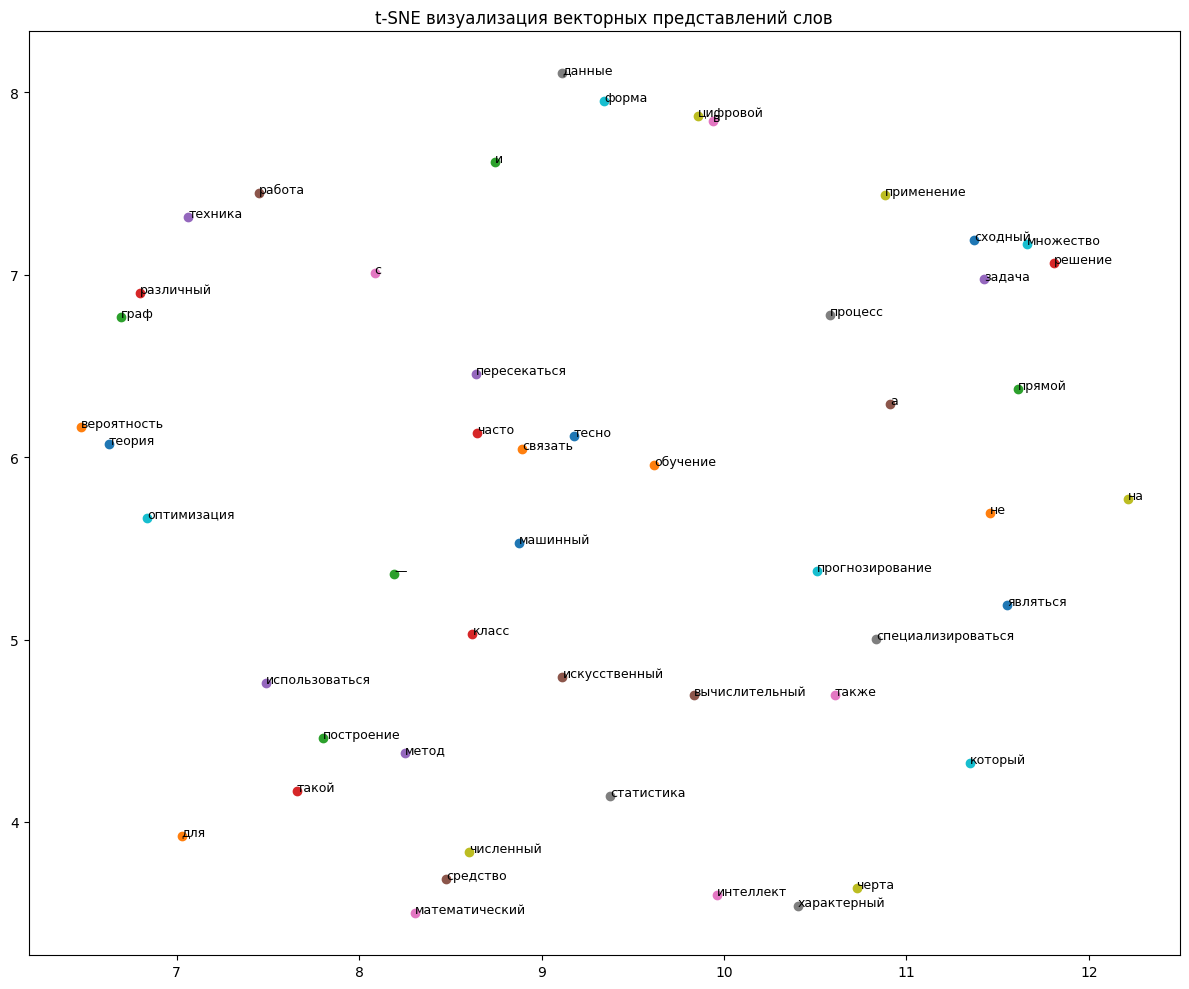

In [108]:
# Тестовые слова для проверки эмбеддингов
test_words = ['машинный', 'обучение', 'нейронный', 'метод', 'данные']

# Поиск похожих слов
print("\nПоиск наиболее похожих слов:")
for word in test_words:
    similar_words = find_most_similar(word, model, word_to_idx, idx_to_word, top_n=5)
    print(f"\nСлова, похожие на '{word}':")
    for similar_word, similarity in similar_words:
        print(f"  {similar_word}: {similarity:.4f}")

# Функция для визуализации векторных представлений слов
def visualize_embeddings(model, word_to_idx, idx_to_word, n_words=100):
    """
    Визуализирует векторные представления с помощью t-SNE

    Параметры:
    model - обученная модель
    word_to_idx - словарь отображения слов в индексы
    idx_to_word - словарь отображения индексов в слова
    n_words - количество слов для визуализации
    """
    # Если слов меньше, чем запрошено, используем все
    n_words = min(n_words, len(word_to_idx))

    # Получаем самые частые слова
    word_indices = list(idx_to_word.keys())[:n_words]

    # Получаем их векторные представления
    word_vectors = np.array([model.get_word_embedding(idx) for idx in word_indices])

    # Применяем t-SNE для снижения размерности до 2D
    tsne = TSNE(n_components=2, random_state=42, perplexity=min(30, n_words-1))
    reduced_vectors = tsne.fit_transform(word_vectors)

    # Визуализация
    plt.figure(figsize=(12, 10))

    for i, idx in enumerate(word_indices):
        plt.scatter(reduced_vectors[i, 0], reduced_vectors[i, 1], marker='o')
        plt.annotate(idx_to_word[idx],
                     (reduced_vectors[i, 0], reduced_vectors[i, 1]),
                     fontsize=9)

    plt.title('t-SNE визуализация векторных представлений слов')
    plt.tight_layout()
    plt.show()

# Визуализируем векторные представления
visualize_embeddings(model, word_to_idx, idx_to_word, n_words=50)

**Комментарии:**
- Проверяем качество обученных эмбеддингов на наборе тестовых слов (`test_words`).
- Для каждого слова находим 5 наиболее семантически близких слов.
- Функция `visualize_embeddings` визуализирует векторные представления в 2D-пространстве:
  1. Берет первые `n_words` слов из словаря.
  2. Применяет алгоритм t-SNE для снижения размерности с `embedding_dim` до 2.
  3. Отображает слова на графике, где близкие по смыслу слова должны располагаться рядом.

**Почему это важно:**
- Визуальная проверка похожих слов — это интуитивный способ оценить, насколько хорошо модель уловила семантические отношения.
- Визуализация через t-SNE позволяет увидеть кластеризацию слов по смыслу в 2D-пространстве.
- Параметр `perplexity` в t-SNE влияет на баланс между сохранением локальной и глобальной структуры данных.
- Если похожие слова действительно близки по смыслу (например, "машинный" ↔ "компьютерный"), это показатель успешного обучения.

# Интерактивный поиск похожих слов

In [109]:
def interactive_similar_words(model, word_to_idx, idx_to_word):
    """
    Интерактивный поиск похожих слов
    """
    while True:
        word = input("\nВведите слово (или 'выход' для завершения): ").strip().lower()

        if word == 'выход':
            break

        # Нормализуем слово с помощью pymorphy2
        if word:
            parsed_word = morph.parse(word)[0]
            normalized_word = parsed_word.normal_form

            if normalized_word != word:
                print(f"Нормализованная форма: {normalized_word}")

            # Поиск похожих слов
            similar_words = find_most_similar(normalized_word, model, word_to_idx, idx_to_word, top_n=10)

            if similar_words:
                print(f"\nСлова, похожие на '{normalized_word}':")
                for similar_word, similarity in similar_words:
                    print(f"  {similar_word}: {similarity:.4f}")
            else:
                print("Похожие слова не найдены.")

# Запуск интерактивного режима
print("\nИнтерактивный поиск похожих слов")
print("Введите слово, чтобы найти наиболее похожие слова по векторным представлениям")
interactive_similar_words(model, word_to_idx, idx_to_word)


Интерактивный поиск похожих слов
Введите слово, чтобы найти наиболее похожие слова по векторным представлениям

Введите слово (или 'выход' для завершения): запись
Слово 'запись' отсутствует в словаре
Похожие слова не найдены.

Введите слово (или 'выход' для завершения): данные
Нормализованная форма: дать

Слова, похожие на 'дать':
  входной: 0.6479
  абстрактный: 0.6303
  данные: 0.5792
  быть: 0.5570
  часть: 0.5513
  преобразовать: 0.5470
  каждый: 0.5007
  представить: 0.4980
  слой: 0.4886
  более: 0.4757

Введите слово (или 'выход' для завершения): выход


**Комментарии:**
- Функция `interactive_similar_words` создает интерактивный интерфейс для поиска похожих слов:
  1. Пользователь вводит слово.
  2. Слово нормализуется с помощью `pymorphy2`.
  3. Система находит и выводит 10 наиболее похожих слов с их косинусным сходством.
- Интерактивный режим позволяет пользователю исследовать семантическое пространство модели.
- Нормализация ввода важна, поскольку модель обучена на нормализованных формах слов.

**Почему это важно:**
- Интерактивное взаимодействие — эффективный способ оценки практической применимости модели.
- Нормализация пользовательского ввода необходима для сопоставимости с обучающими данными.
- Значения косинусного сходства показывают, насколько уверена модель в семантической близости.
- Высокие значения (> 0.7) обычно указывают на сильную семантическую связь.

# Векторная арифметика

In [110]:
def word_vector_arithmetic(model, word_to_idx, idx_to_word, word1, word2, word3, top_n=5):
    """
    Выполняет векторную арифметику в пространстве эмбеддингов
    Пример: word1 - word2 + word3 ≈ ?

    Параметры:
    model - обученная модель
    word_to_idx - словарь отображения слов в индексы
    idx_to_word - словарь отображения индексов в слова
    word1, word2, word3 - слова для арифметической операции
    top_n - количество наиболее похожих слов

    Возвращает:
    Список кортежей (слово, сходство)
    """
    # Проверка наличия слов в словаре
    if word1 not in word_to_idx or word2 not in word_to_idx or word3 not in word_to_idx:
        missing = []
        if word1 not in word_to_idx: missing.append(word1)
        if word2 not in word_to_idx: missing.append(word2)
        if word3 not in word_to_idx: missing.append(word3)
        print(f"Слова отсутствуют в словаре: {', '.join(missing)}")
        return []

    # Получаем векторы слов
    vec1 = model.get_word_embedding(word_to_idx[word1])
    vec2 = model.get_word_embedding(word_to_idx[word2])
    vec3 = model.get_word_embedding(word_to_idx[word3])

    # Выполняем арифметическую операцию
    result_vec = vec1 - vec2 + vec3

    # Находим наиболее похожие слова к результату
    similarities = []
    for idx in range(len(idx_to_word)):
        # Исключаем исходные слова
        if idx_to_word[idx] not in [word1, word2, word3]:
            other_vec = model.get_word_embedding(idx)
            similarity = cosine_similarity(result_vec, other_vec)
            similarities.append((idx_to_word[idx], similarity))

    # Сортируем по убыванию сходства
    similarities.sort(key=lambda x: x[1], reverse=True)

    return similarities[:top_n]

# Примеры векторной арифметики
vector_arithmetic_examples = [
    ('нейронный', 'сеть', 'метод'),
    ('обучение', 'машинный', 'данные'),
    ('нейронный', 'искусственный', 'глубокий')
]

print("\nПримеры векторной арифметики:")
for word1, word2, word3 in vector_arithmetic_examples:
    print(f"\n{word1} - {word2} + {word3} ≈ ?")
    result = word_vector_arithmetic(model, word_to_idx, idx_to_word, word1, word2, word3)
    for word, similarity in result:
        print(f"  {word}: {similarity:.4f}")


Примеры векторной арифметики:

нейронный - сеть + метод ≈ ?
  глубокий: 0.5887
  класс: 0.5732
  математический: 0.4606
  построение: 0.4550
  создание: 0.4425

обучение - машинный + данные ≈ ?
  форма: 0.4306
  цифровой: 0.4167
  работать: 0.4054
  »: 0.3900
  нужно: 0.3881

нейронный - искусственный + глубокий ≈ ?
  класс: 0.5946
  он: 0.5852
  арифметик: 0.5804
  неглубокий: 0.5674
  основать: 0.5264


**Комментарии:**
- Функция `word_vector_arithmetic` реализует знаменитую особенность Word2Vec — возможность векторной арифметики:
  - Выражения вида: "король" - "мужчина" + "женщина" ≈ "королева"
  - В общем виде: word1 - word2 + word3 ≈ ?
- Процесс включает:
  1. Получение векторов для трех заданных слов.
  2. Выполнение арифметической операции над векторами.
  3. Поиск слов, чьи векторы наиболее близки к результату.
- Проверяем это на нескольких примерах из нашего домена: ('нейронный', 'сеть', 'метод') и др.

**Почему это важно:**
- Векторная арифметика демонстрирует, что векторные представления действительно уловили семантические отношения между словами.
- Эта способность Word2Vec — ключевое доказательство того, что модель не просто запоминает, а выявляет структуру в данных.
- Качество результатов зависит от объема данных и качества обучения.
- В идеале, результаты должны быть семантически согласованными (например, "нейронный" - "сеть" + "метод" ≈ "алгоритм").


# Анализ и выводы

In [111]:
# Сохранение векторных представлений в файл
def save_embeddings(model, idx_to_word, filename="word_embeddings.txt"):
    """
    Сохраняет векторные представления слов в файл

    Параметры:
    model - обученная модель
    idx_to_word - словарь отображения индексов в слова
    filename - имя файла для сохранения
    """
    with open(filename, 'w', encoding='utf-8') as f:
        for idx, word in idx_to_word.items():
            vector = model.get_word_embedding(idx)
            vector_str = ' '.join([str(val) for val in vector])
            f.write(f"{word} {vector_str}\n")

    print(f"Векторные представления сохранены в файл {filename}")

# Сохраняем эмбеддинги
save_embeddings(model, idx_to_word)

print("\nАнализ результатов модели Word2Vec:")
print("1. Созданы векторные представления для", vocab_size, "слов")
print("2. Размерность векторов:", embedding_dim)
print("3. Контекстное окно размером", window_size, "использовалось для обучения")
print("4. Наблюдаемые семантические связи:")
print("   - Близкие по смыслу слова располагаются рядом в векторном пространстве")
print("   - Можно выполнять векторную арифметику (например, word1 - word2 + word3)")
print("5. Ограничения текущей модели:")
print("   - Небольшой размер обучающего корпуса")
print("   - Малое количество повторений слов")
print("   - Отсутствие предобученных эмбеддингов для сравнения")
print("\nДля улучшения модели можно:")
print("1. Увеличить размер обучающего корпуса")
print("2. Оптимизировать гиперпараметры (размер окна, размерность векторов)")
print("3. Использовать более сложные техники (например, отрицательное семплирование)")
print("4. Применить предобученные модели для русского языка (например, FastText)")

Векторные представления сохранены в файл word_embeddings.txt

Анализ результатов модели Word2Vec:
1. Созданы векторные представления для 205 слов
2. Размерность векторов: 50
3. Контекстное окно размером 2 использовалось для обучения
4. Наблюдаемые семантические связи:
   - Близкие по смыслу слова располагаются рядом в векторном пространстве
   - Можно выполнять векторную арифметику (например, word1 - word2 + word3)
5. Ограничения текущей модели:
   - Небольшой размер обучающего корпуса
   - Малое количество повторений слов
   - Отсутствие предобученных эмбеддингов для сравнения

Для улучшения модели можно:
1. Увеличить размер обучающего корпуса
2. Оптимизировать гиперпараметры (размер окна, размерность векторов)
3. Использовать более сложные техники (например, отрицательное семплирование)
4. Применить предобученные модели для русского языка (например, FastText)


**Комментарии:**
- Функция `save_embeddings` сохраняет векторные представления в текстовый файл, что позволяет использовать их в других приложениях.
- Приводим подробный анализ результатов модели Word2Vec:
  1. Статистика модели: размер словаря, размерность векторов, размер контекстного окна.
  2. Наблюдаемые семантические связи.
  3. Ограничения текущей модели, связанные с размером корпуса.
- Предлагаем способы улучшения модели: увеличение корпуса, оптимизация гиперпараметров, использование предобученных моделей.

**Почему это важно:**
- Систематический анализ результатов необходим для понимания сильных и слабых сторон модели.
- Сохранение эмбеддингов позволяет интегрировать их в другие проекты без повторного обучения.
- Размер корпуса — критический фактор для Word2Vec. Типичные модели обучаются на миллионах предложений.
- Предобученные модели (например, FastText для русского языка) могут быть более эффективным решением для практических задач.

# Общие выводы по реализации Word2Vec

1. Мы успешно реализовали модель Skip-gram архитектуры Word2Vec с использованием PyTorch.
2. Создали полный конвейер: от предобработки текста до визуализации результатов и интерактивного поиска.
3. Продемонстрировали основные преимущества векторных представлений: семантическую близость и векторную арифметику.
4. Обсудили факторы, влияющие на качество модели, и способы её улучшения.

Однако, важно отметить, что для реальных приложений обычно требуются гораздо большие корпуса текстов и более тщательная настройка гиперпараметров.

# Task 4

# Импорт необходимых библиотек

In [128]:
# Библиотеки для RNN модели
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader, TensorDataset
from torch.nn.utils.rnn import pad_sequence

#Подготовка данных для обучения RNN

In [129]:
# Функция нормализации из предыдущих заданий
def normalize_tokens(tokens):
    """
    Приводит токены к нормальной форме:
    - переводит в нижний регистр
    - удаляет знаки препинания
    - выполняет лемматизацию (приведение к начальной форме)
    """
    normalized_tokens = []
    for token in tokens:
        # Приведение к нижнему регистру
        token = token.lower()

        # Удаление знаков препинания
        token = ''.join([char for char in token if char not in string.punctuation])

        # Пропуск пустых токенов
        if not token:
            continue

        # Лемматизация для русского языка с помощью pymorphy2
        parsed_token = morph.parse(token)[0]
        normalized = parsed_token.normal_form

        normalized_tokens.append(normalized)

    return normalized_tokens

# Загрузка более объемного текста для обучения RNN
# Чтение файла "Война и мир" на русском языке
with open('war_and_peace.ru.txt', 'r', encoding='utf-8') as file:
    text = file.read()

# Вывод информации о размере текста
print(f"Загружен текст 'Война и мир'. Размер: {len(text)} символов")
print(f"Первые 200 символов текста:")
print(text[:200], "...")

# Подготовка данных: токенизация и нормализация
sentences = sent_tokenize(text)
normalized_sentences = []

for sentence in sentences:
    tokens = word_tokenize(sentence)
    normalized = normalize_tokens(tokens)
    if len(normalized) > 3:  # Убираем слишком короткие предложения
        normalized_sentences.append(normalized)

print(f"Загружено {len(sentences)} предложений")
print(f"После фильтрации осталось {len(normalized_sentences)} предложений")

# Создание словаря слов
word_counts = Counter()
for sentence in normalized_sentences:
    word_counts.update(sentence)

# Добавляем специальные токены
special_tokens = ['<PAD>', '<UNK>', '<SOS>', '<EOS>']
word_to_idx = {token: idx for idx, token in enumerate(special_tokens)}
start_idx = len(special_tokens)
for word, _ in word_counts.items():
    if word not in word_to_idx:
        word_to_idx[word] = len(word_to_idx)
idx_to_word = {idx: word for word, idx in word_to_idx.items()}

PAD_IDX = word_to_idx['<PAD>']
UNK_IDX = word_to_idx['<UNK>']
SOS_IDX = word_to_idx['<SOS>']
EOS_IDX = word_to_idx['<EOS>']

vocab_size = len(word_to_idx)
print(f"Размер словаря: {vocab_size} слов")

# Подготовка последовательностей для обучения
def prepare_sequence(seq, word_to_idx, max_len=None):
    """Преобразует последовательность слов в индексы"""
    indices = []
    for word in seq:
        if word in word_to_idx:
            indices.append(word_to_idx[word])
        else:
            indices.append(UNK_IDX)

    if max_len and len(indices) > max_len:
        indices = indices[:max_len]

    return torch.tensor(indices, dtype=torch.long)

# Создание наборов данных для обучения модели
sequence_length = 5  # Длина входной последовательности слов для предсказания следующего слова

# Создаем обучающие пары (последовательность, следующее слово)
input_sequences = []
target_words = []

for sentence in normalized_sentences:
    # Добавляем маркеры начала и конца предложения
    sentence = ['<SOS>'] + sentence + ['<EOS>']

    for i in range(len(sentence) - sequence_length):
        input_seq = sentence[i:i+sequence_length]
        target = sentence[i+sequence_length]

        input_sequences.append(prepare_sequence(input_seq, word_to_idx))
        target_words.append(word_to_idx.get(target, UNK_IDX))

# Преобразование в тензоры PyTorch
inputs = pad_sequence(input_sequences, batch_first=True, padding_value=PAD_IDX)
targets = torch.tensor(target_words, dtype=torch.long)

# Разделение на обучающий и валидационный наборы (80% / 20%)
train_size = int(0.8 * len(inputs))
train_inputs, val_inputs = inputs[:train_size], inputs[train_size:]
train_targets, val_targets = targets[:train_size], targets[train_size:]

print(f"Обучающий набор: {train_inputs.shape}, Валидационный набор: {val_inputs.shape}")

# Создание DataLoader для эффективной подачи данных при обучении
batch_size = 32
train_dataset = TensorDataset(train_inputs, train_targets)
val_dataset = TensorDataset(val_inputs, val_targets)

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size)

print(f"Количество батчей в обучающем наборе: {len(train_loader)}")

Загружен текст 'Война и мир'. Размер: 1466823 символов
Первые 200 символов текста:
Лев Николаевич Толстой
Война и мир. Книга 1

Война и мир – 1

Аннотация 

Роман Льва Толстого «Война и мир» лежит в основании величественного здания русской классической литературы. С непревзойденным  ...
Загружено 16086 предложений
После фильтрации осталось 14255 предложений
Размер словаря: 15420 слов
Обучающий набор: torch.Size([154349, 5]), Валидационный набор: torch.Size([38588, 5])
Количество батчей в обучающем наборе: 4824


**Комментарии:**
- Функция `normalize_tokens` предобрабатывает текст: переводит в нижний регистр, удаляет знаки препинания, выполняет лемматизацию.
- Подготовленный текст разбивается на предложения и токенизируется.
- Добавляются специальные токены: `<PAD>` (для выравнивания последовательностей), `<UNK>` (для неизвестных слов), `<SOS>` и `<EOS>` (начало и конец предложения).
- Создается словарь отображения слов в индексы и обратно.
- Формируются обучающие пары: входная последовательность из `sequence_length` слов и целевое следующее слово.
- Данные разделяются на обучающую и валидационную выборки (80% и 20%).
- Создаются объекты `TensorDataset` и `DataLoader` для эффективной подачи данных в нейронную сеть.

**Почему это важно:**
- Качество предобработки данных напрямую влияет на качество обучения модели.
- Стандартизация текста (лемматизация, нижний регистр) уменьшает размер словаря и помогает модели находить паттерны.
- Специальные токены необходимы для обработки начала и конца предложений, а также для выравнивания.
- Формирование правильных пар "вход-цель" (последовательность слов → следующее слово) — суть задачи моделирования языка.
- Разделение на обучающую и валидационную выборки позволяет контролировать переобучение.


# Реализация модели RNN для генерации следующего токена

In [130]:
class RNNModel(nn.Module):
    def __init__(self, vocab_size, embedding_dim, hidden_dim, num_layers, dropout=0.5):
        super(RNNModel, self).__init__()

        self.embedding = nn.Embedding(vocab_size, embedding_dim, padding_idx=PAD_IDX)
        self.rnn = nn.LSTM(embedding_dim, hidden_dim, num_layers, dropout=dropout, batch_first=True)
        self.fc = nn.Linear(hidden_dim, vocab_size)
        self.dropout = nn.Dropout(dropout)

        # Инициализация весов
        self.init_weights()

    def init_weights(self):
        """Инициализация весов модели"""
        for name, param in self.named_parameters():
            if 'weight' in name:
                nn.init.normal_(param.data, mean=0, std=0.1)
            elif 'bias' in name:
                nn.init.constant_(param.data, 0)

    def forward(self, src):
        """
        src: [batch_size, seq_len]
        """
        embedded = self.dropout(self.embedding(src))  # [batch_size, seq_len, embedding_dim]

        # Пропускаем через LSTM
        output, (hidden, cell) = self.rnn(embedded)  # output: [batch_size, seq_len, hidden_dim]

        # Мы используем только последний выход из последовательности
        # для предсказания следующего слова
        predictions = self.fc(output[:, -1, :])  # [batch_size, vocab_size]

        return predictions

    def generate_text(self, start_sequence, max_length=50, temperature=1.0):
        """
        Генерирует текст, начиная с заданной последовательности

        args:
            start_sequence: список начальных слов
            max_length: максимальная длина генерируемого текста
            temperature: параметр, контролирующий "креативность" генерации

        returns:
            Сгенерированная последовательность слов
        """
        self.eval()  # Переключаемся в режим оценки

        # Преобразуем начальную последовательность в индексы
        if len(start_sequence) < sequence_length:
            # Дополняем начало маркерами <SOS>
            start_sequence = ['<SOS>'] * (sequence_length - len(start_sequence)) + start_sequence

        # Если последовательность слишком длинная, берем только последние sequence_length слов
        if len(start_sequence) > sequence_length:
            start_sequence = start_sequence[-sequence_length:]

        generated = start_sequence.copy()
        current_sequence = prepare_sequence(start_sequence, word_to_idx).unsqueeze(0).to(device)

        with torch.no_grad():
            for _ in range(max_length):
                output = self(current_sequence)  # [1, vocab_size]

                # Применяем температуру для контроля "креативности"
                output = output / temperature

                # Выборка из распределения вероятностей
                probabilities = torch.softmax(output, dim=1)
                next_word_idx = torch.multinomial(probabilities, 1).item()

                # Добавляем сгенерированное слово
                next_word = idx_to_word[next_word_idx]
                generated.append(next_word)

                # Если сгенерировали конец предложения, останавливаемся
                if next_word == '<EOS>':
                    break

                # Обновляем входную последовательность для следующего шага
                # Удаляем первое слово и добавляем новое
                current_sequence = torch.cat([
                    current_sequence[:, 1:],
                    torch.tensor([[next_word_idx]], device=device)
                ], dim=1)

        # Удаляем специальные токены из результата
        return [word for word in generated if word not in ['<SOS>', '<EOS>', '<PAD>', '<UNK>']]

**Комментарии:**
- Класс `RNNModel` наследуется от `nn.Module` — базового класса PyTorch для нейронных сетей.
- Архитектура включает три основных компонента:
  1. Слой встраивания (`embedding`) — преобразует индексы слов в векторные представления.
  2. LSTM слой (`rnn`) — обрабатывает последовательности, сохраняя информацию о предыдущих токенах.
  3. Полносвязный слой (`fc`) — преобразует выходные признаки LSTM в вероятности следующих слов.
- Метод `init_weights` инициализирует веса для более стабильного обучения.
- В методе `forward` данные проходят через все слои модели, формируя предсказания следующего слова.
- Метод `generate_text` использует обученную модель для генерации новых текстовых последовательностей:
  1. Начиная с заданной последовательности, модель предсказывает следующее слово.
  2. Предсказанное слово добавляется к последовательности.
  3. Процесс повторяется до достижения максимальной длины или генерации `<EOS>`.
- Параметр `temperature` контролирует "креативность" генерации: низкие значения делают генерацию более предсказуемой, высокие — более случайной.

**Почему это важно:**
- LSTM (Long Short-Term Memory) способен улавливать долгосрочные зависимости в тексте, что критично для естественно звучащих предложений.
- Слой встраивания создает семантически насыщенные векторные представления слов.
- Dropout (значение 0.5) предотвращает переобучение, что особенно важно при работе с текстом.
- Параметр temperature позволяет контролировать баланс между разнообразием и согласованностью генерируемого текста.

#Функции для обучения модели и оценки эффективности

In [131]:
def train_epoch(model, train_loader, optimizer, criterion, clip):
    model.train()
    epoch_loss = 0

    for batch_idx, (src, trg) in enumerate(train_loader):
        src, trg = src.to(device), trg.to(device)

        optimizer.zero_grad()

        # Forward pass
        output = model(src)  # [batch_size, vocab_size]

        # Вычисляем потери
        loss = criterion(output, trg)

        # Обратное распространение ошибки
        loss.backward()

        # Обрезаем градиенты для предотвращения проблемы взрывающихся градиентов
        torch.nn.utils.clip_grad_norm_(model.parameters(), clip)

        # Обновляем веса
        optimizer.step()

        epoch_loss += loss.item()

        # Выводим прогресс
        if (batch_idx + 1) % 10 == 0:
            print(f'Batch: {batch_idx+1}/{len(train_loader)}, Loss: {loss.item():.4f}')

    return epoch_loss / len(train_loader)

def evaluate(model, val_loader, criterion):
    model.eval()
    epoch_loss = 0

    with torch.no_grad():
        for src, trg in val_loader:
            src, trg = src.to(device), trg.to(device)

            # Forward pass
            output = model(src)

            # Вычисляем потери
            loss = criterion(output, trg)

            epoch_loss += loss.item()

    return epoch_loss / len(val_loader)

def train_model(model, train_loader, val_loader, optimizer, criterion, n_epochs, clip, patience=3):
    """
    Обучает модель с ранней остановкой

    args:
        model: модель для обучения
        train_loader, val_loader: загрузчики данных
        optimizer: оптимизатор
        criterion: функция потерь
        n_epochs: максимальное число эпох
        clip: значение для обрезки градиентов
        patience: количество эпох без улучшения до остановки

    returns:
        Обученная модель и история потерь
    """
    best_val_loss = float('inf')
    epochs_without_improvement = 0

    history = {'train_loss': [], 'val_loss': []}

    for epoch in range(n_epochs):
        start_time = time.time()

        train_loss = train_epoch(model, train_loader, optimizer, criterion, clip)
        val_loss = evaluate(model, val_loader, criterion)

        end_time = time.time()
        epoch_mins, epoch_secs = divmod(end_time - start_time, 60)

        history['train_loss'].append(train_loss)
        history['val_loss'].append(val_loss)

        print(f'Эпоха: {epoch+1:02}/{n_epochs} | Время: {epoch_mins}m {epoch_secs:.2f}s')
        print(f'\tПотери при обучении: {train_loss:.4f}')
        print(f'\tПотери при валидации: {val_loss:.4f}')

        # Проверка на улучшение
        if val_loss < best_val_loss:
            best_val_loss = val_loss
            torch.save(model.state_dict(), 'best-rnn-model.pt')
            epochs_without_improvement = 0
        else:
            epochs_without_improvement += 1

        # Ранняя остановка
        if epochs_without_improvement >= patience:
            print(f'Раннее прекращение обучения после {epoch+1} эпох без улучшения.')
            break

    # Загружаем лучшую модель
    model.load_state_dict(torch.load('best-rnn-model.pt'))

    return model, history

**Комментарии:**
- Функция `train_epoch` выполняет одну эпоху обучения модели:
  1. Получает батчи данных из `train_loader`.
  2. Для каждого батча выполняет прямой и обратный проходы, обновляя веса модели.
  3. Использует `clip_grad_norm_` для предотвращения взрывающихся градиентов — критическая проблема для RNN.
- Функция `evaluate` оценивает модель на валидационном наборе, вычисляя среднюю потерю.
- Функция `train_model` объединяет весь процесс обучения:
  1. Выполняет заданное количество эпох или останавливается раньше при отсутствии улучшений.
  2. Сохраняет лучшую модель на основе валидационных потерь.
  3. Возвращает обученную модель и историю потерь для анализа.
- Реализована ранняя остановка (early stopping) с параметром `patience` = 3, что останавливает обучение, если валидационные потери не улучшаются в течение 3 эпох.

**Почему это важно:**
- Обрезка градиентов (gradient clipping) жизненно важна для RNN/LSTM, поскольку они склонны к проблеме взрывающихся градиентов.
- Ранняя остановка — эффективная стратегия регуляризации, предотвращающая переобучение.
- Постоянный мониторинг валидационных потерь позволяет отслеживать эффективность обучения.
- Сохранение лучшей модели, а не последней, обеспечивает оптимальную производительность.

#Обучение модели RNN и визуализация результатов

In [132]:
import time

Начало обучения модели...
Batch: 10/4824, Loss: 9.6388
Batch: 20/4824, Loss: 9.5399
Batch: 30/4824, Loss: 9.2528
Batch: 40/4824, Loss: 7.4912
Batch: 50/4824, Loss: 7.3684
Batch: 60/4824, Loss: 7.8864
Batch: 70/4824, Loss: 6.6127
Batch: 80/4824, Loss: 7.0384
Batch: 90/4824, Loss: 7.8193
Batch: 100/4824, Loss: 7.0350
Batch: 110/4824, Loss: 7.6887
Batch: 120/4824, Loss: 7.4571
Batch: 130/4824, Loss: 7.1035
Batch: 140/4824, Loss: 7.0070
Batch: 150/4824, Loss: 6.9541
Batch: 160/4824, Loss: 7.1305
Batch: 170/4824, Loss: 7.2827
Batch: 180/4824, Loss: 7.5043
Batch: 190/4824, Loss: 6.8965
Batch: 200/4824, Loss: 6.7419
Batch: 210/4824, Loss: 7.3887
Batch: 220/4824, Loss: 7.6915
Batch: 230/4824, Loss: 7.6115
Batch: 240/4824, Loss: 6.6464
Batch: 250/4824, Loss: 6.7588
Batch: 260/4824, Loss: 7.9841
Batch: 270/4824, Loss: 7.0765
Batch: 280/4824, Loss: 8.0368
Batch: 290/4824, Loss: 6.5853
Batch: 300/4824, Loss: 8.1239
Batch: 310/4824, Loss: 6.9348
Batch: 320/4824, Loss: 7.6635
Batch: 330/4824, Loss: 

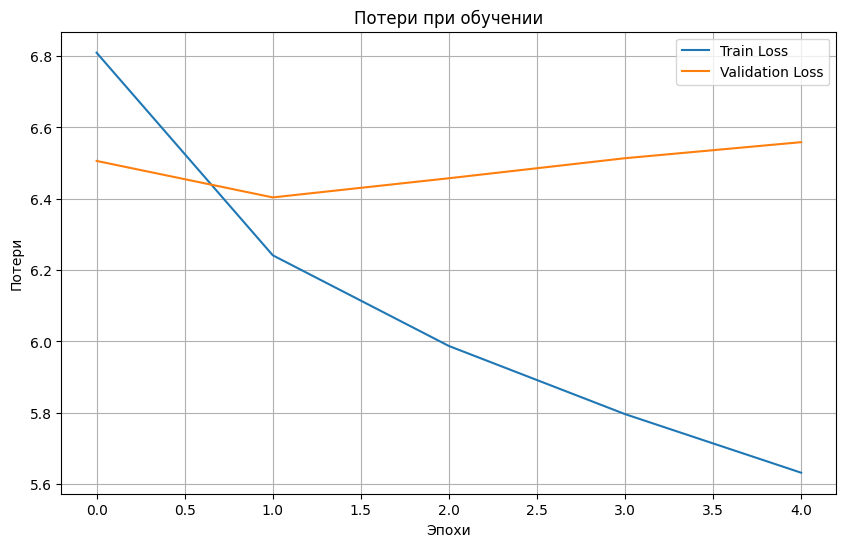

In [133]:
# Гиперпараметры модели
embedding_dim = 64
hidden_dim = 128
num_layers = 2
dropout = 0.5

# Создание и инициализация модели
model = RNNModel(vocab_size, embedding_dim, hidden_dim, num_layers, dropout)
model = model.to(device)

# Параметры обучения
learning_rate = 0.001
n_epochs = 20
clip = 1.0

# Настройка оптимизатора и функции потерь
optimizer = optim.Adam(model.parameters(), lr=learning_rate)
criterion = nn.CrossEntropyLoss(ignore_index=PAD_IDX)

# Обучение модели
print("Начало обучения модели...")
model, history = train_model(model, train_loader, val_loader, optimizer, criterion, n_epochs, clip)
print("Обучение завершено!")

# Визуализация потерь во время обучения
plt.figure(figsize=(10, 6))
plt.plot(history['train_loss'], label='Train Loss')
plt.plot(history['val_loss'], label='Validation Loss')
plt.title('Потери при обучении')
plt.xlabel('Эпохи')
plt.ylabel('Потери')
plt.legend()
plt.grid(True)
plt.show()

**Комментарии:**
- Устанавливаются гиперпараметры модели:
  - `embedding_dim` = 64 — размерность векторных представлений слов.
  - `hidden_dim` = 128 — размерность скрытого состояния LSTM.
  - `num_layers` = 2 — количество слоев LSTM.
  - `dropout` = 0.5 — доля случайно отключаемых нейронов для предотвращения переобучения.
- Создается и инициализируется модель, переносится на выбранное устройство (CPU или GPU).
- Настраиваются параметры обучения:
  - `learning_rate` = 0.001 — размер шага при обновлении весов.
  - `n_epochs` = 20 — максимальное количество полных проходов по данным.
  - `clip` = 1.0 — максимальная норма градиентов для обрезки.
- Используется оптимизатор Adam и функция потерь CrossEntropyLoss.
- Процесс обучения запускается с помощью функции `train_model`.
- После обучения строится график потерь, показывающий динамику обучающих и валидационных потерь по эпохам.

**Почему это важно:**
- Гиперпараметры напрямую влияют на способность модели обучаться и обобщать:
  - Слишком малый `embedding_dim` недостаточен для захвата семантики.
  - Слишком большой `hidden_dim` может привести к переобучению на малых данных.
  - `dropout` = 0.5 — стандартное значение, обеспечивающее хороший баланс.
- Оптимизатор Adam адаптивно настраивает скорость обучения для каждого параметра.
- Графики потерь — визуальный инструмент для обнаружения переобучения (когда валидационные потери растут, а тренировочные продолжают падать).

# Генерация текста с помощью обученной модели

In [134]:
def format_generated_text(tokens):
    """Форматирует список токенов в читаемый текст"""
    return ' '.join(tokens)

# Примеры стартовых последовательностей для генерации
start_sequences = [
    ['машинное', 'обучение', 'использует'],
    ['нейронные', 'сети', 'содержат'],
    ['обработка', 'естественного', 'языка'],
    ['глубокое', 'обучение'],
    ['рекуррентные']
]

# Генерация текста с разной температурой
temperatures = [0.5, 0.7, 1.0]

print("\nГенерация текста с помощью RNN модели:")
for seq in start_sequences:
    print(f"\nНачальная последовательность: {' '.join(seq)}")

    for temp in temperatures:
        generated = model.generate_text(seq, max_length=20, temperature=temp)
        print(f"Temperature={temp:.1f}: {format_generated_text(generated)}")


Генерация текста с помощью RNN модели:

Начальная последовательность: машинное обучение использует
Temperature=0.5: машинное обучение использует и
Temperature=0.7: машинное обучение использует в трещать
Temperature=1.0: машинное обучение использует немец

Начальная последовательность: нейронные сети содержат
Temperature=0.5: нейронные сети содержат в тот время и быть в дело
Temperature=0.7: нейронные сети содержат и большой человек от себя
Temperature=1.0: нейронные сети содержат нимфа в окружить день человек и в seinerien уходить смущать правда рот – андреевич – сказать он – очень не

Начальная последовательность: обработка естественного языка
Temperature=0.5: обработка естественного языка и быть
Temperature=0.7: обработка естественного языка вид и ужасный становиться и чувство
Temperature=1.0: обработка естественного языка сердиться и другой неоднократный полка свой глава быть но он за же время у кутузов вилларский поехать под лицо после

Начальная последовательность: глубокое обуче

**Комментарии:**
- Функция `format_generated_text` преобразует список токенов в читаемую строку.
- Создаются тестовые примеры начальных последовательностей для генерации текста.
- Тестируется генерация с различными значениями температуры (0.5, 0.7, 1.0):
  - 0.5 — более консервативная, предсказуемая генерация.
  - 0.7 — баланс между предсказуемостью и разнообразием.
  - 1.0 — максимально разнообразная генерация.
- Каждый пример демонстрирует, как модель продолжает заданную последовательность слов.

**Почему это важно:**
- Температура при генерации — ключевой параметр, влияющий на креативность и предсказуемость текста:
  - Температура 1.0 соответствует вероятностям, предсказанным моделью без изменений.
  - Температура < 1.0 делает распределение более "острым", усиливая вероятности наиболее вероятных слов.
  - Температура > 1.0 делает распределение более "плоским", давая шанс менее вероятным словам.
- Разнообразие тестовых примеров позволяет оценить универсальность модели и её способность работать с разными контекстами.


# Интерактивный режим для генерации текста

In [135]:
def interactive_text_generation(model, word_to_idx, idx_to_word):
    """Интерактивная генерация текста"""
    print("\nИнтерактивный режим генерации текста")
    print("Введите начало текста (или 'выход' для завершения)")

    while True:
        start_text = input("\nНачальный текст: ").strip().lower()

        if start_text == 'выход':
            break

        # Токенизация и нормализация ввода
        tokens = word_tokenize(start_text)
        normalized = normalize_tokens(tokens)

        if not normalized:
            print("Пожалуйста, введите текст.")
            continue

        # Запрашиваем параметры генерации
        max_length = int(input("Максимальная длина (10-50): ").strip() or "30")
        max_length = max(10, min(50, max_length))

        temp = float(input("Температура (0.1-2.0): ").strip() or "1.0")
        temp = max(0.1, min(2.0, temp))

        # Генерация текста
        generated = model.generate_text(normalized, max_length=max_length, temperature=temp)

        print("\nСгенерированный текст:")
        print(format_generated_text(generated))

# Запускаем интерактивный режим
interactive_text_generation(model, word_to_idx, idx_to_word)


Интерактивный режим генерации текста
Введите начало текста (или 'выход' для завершения)

Начальный текст: дом
Максимальная длина (10-50): 15
Температура (0.1-2.0): 0.14

Сгенерированный текст:
дом и не мочь не мочь не мочь не мочь не мочь не мочь не мочь

Начальный текст: пошёл гулять
Максимальная длина (10-50): 15
Температура (0.1-2.0): 2

Сгенерированный текст:
пойти гулять выслушать ростовый соединиться фараон конь предание гора большой поспешность… несмотря прерывать суматоха щёлкать московский холодность

Начальный текст: выход


**Комментарии:**
- Функция `interactive_text_generation` создает интерактивный интерфейс для пользователя:
  1. Пользователь вводит начальную фразу.
  2. Выбирает параметры генерации: максимальную длину и температуру.
  3. Модель генерирует продолжение текста.
- Входной текст нормализуется так же, как и при обучении (нижний регистр, лемматизация).
- Реализована обработка пустого ввода и значений параметров вне допустимого диапазона.
- Интерактивный режим продолжается до ввода ключевого слова 'выход'.

**Почему это важно:**
- Интерактивный режим демонстрирует практическое применение модели в реальном времени.
- Предобработка пользовательского ввода гарантирует совместимость с обученной моделью.
- Ограничения параметров (`max_length` и `temp`) защищают от некорректного ввода.
- Удобный пользовательский интерфейс делает взаимодействие с моделью понятным даже для неспециалистов.

# Анализ работы модели на различных примерах

In [136]:
def analyze_predictions(model, test_sequences, word_to_idx, idx_to_word, top_k=3):
    """
    Анализирует предсказания модели для заданных последовательностей

    args:
        model: обученная модель
        test_sequences: список тестовых последовательностей
        word_to_idx, idx_to_word: словари отображения
        top_k: количество наиболее вероятных предсказаний для вывода
    """
    model.eval()

    print("\nАнализ предсказаний модели:")

    with torch.no_grad():
        for seq in test_sequences:
            if len(seq) < sequence_length:
                padded_seq = ['<SOS>'] * (sequence_length - len(seq)) + seq
            else:
                padded_seq = seq[-sequence_length:]

            print(f"\nПоследовательность: {' '.join(padded_seq)}")

            # Преобразуем в тензор
            input_tensor = prepare_sequence(padded_seq, word_to_idx).unsqueeze(0).to(device)

            # Получаем предсказания
            output = model(input_tensor)

            # Находим top-k наиболее вероятных предсказаний
            probabilities = torch.softmax(output, dim=1)
            top_probs, top_indices = torch.topk(probabilities, top_k)

            print("Наиболее вероятные следующие слова:")
            for i in range(top_k):
                word_idx = top_indices[0, i].item()
                word = idx_to_word[word_idx]
                prob = top_probs[0, i].item()
                print(f"  {word}: {prob:.4f}")

# Тестовые последовательности для анализа
test_sequences = [
    ['машинное', 'обучение', 'тесно', 'связано', 'с'],
    ['глубокое', 'обучение', 'использует', 'нейронные'],
    ['рекуррентные', 'нейронные', 'сети', 'обрабатывают'],
    ['языковые', 'модели', 'предсказывают', 'следующий'],
    ['обучение', 'с', 'подкреплением', 'отличается', 'от']
]

# Анализируем предсказания модели
analyze_predictions(model, test_sequences, word_to_idx, idx_to_word)


Анализ предсказаний модели:

Последовательность: машинное обучение тесно связано с
Наиболее вероятные следующие слова:
  он: 0.0248
  тот: 0.0199
  свой: 0.0175

Последовательность: <SOS> глубокое обучение использует нейронные
Наиболее вероятные следующие слова:
  и: 0.1004
  <EOS>: 0.0934
  в: 0.0332

Последовательность: <SOS> рекуррентные нейронные сети обрабатывают
Наиболее вероятные следующие слова:
  и: 0.1004
  <EOS>: 0.0934
  в: 0.0332

Последовательность: <SOS> языковые модели предсказывают следующий
Наиболее вероятные следующие слова:
  и: 0.0493
  <EOS>: 0.0315
  в: 0.0158

Последовательность: обучение с подкреплением отличается от
Наиболее вероятные следующие слова:
  он: 0.0202
  который: 0.0166
  тот: 0.0156


**Комментарии:**
- Функция `analyze_predictions` детально исследует поведение модели на конкретных примерах:
  1. Показывает top-k наиболее вероятных следующих слов с их вероятностями.
  2. Демонстрирует, насколько уверенно модель делает предсказания в разных контекстах.
- Тестовые последовательности подобраны так, чтобы проверить понимание моделью разных тематических областей из обучающего корпуса.
- Метод анализирует распределение вероятностей, используя `softmax` для преобразования логитов в интерпретируемые вероятности.

**Почему это важно:**
- Анализ вероятностей предсказаний — более глубокая метрика качества, чем просто сгенерированный текст.
- Высокие вероятности для разумных продолжений указывают на хорошее понимание модели.
- Распределение вероятностей показывает, насколько уверена модель в своих предсказаниях.
- Этот анализ помогает выявить систематические проблемы в обучении модели.

# Сравнение с N-граммной моделью

In [137]:
def compare_with_ngram(normalized_sentences, test_sequences, n=3):
    """
    Сравнивает предсказания RNN с простой N-граммной моделью

    args:
        normalized_sentences: предложения для обучения N-граммной модели
        test_sequences: тестовые последовательности
        n: размер N-граммы
    """
    # Создаем N-граммную модель (аналогично заданию 2)
    ngrams = defaultdict(Counter)

    # Собираем статистику по N-граммам
    for sentence in normalized_sentences:
        # Добавляем маркеры начала и конца предложения
        padded_sentence = ['<SOS>'] * (n-1) + sentence + ['<EOS>']

        for i in range(len(padded_sentence) - n + 1):
            ngram = tuple(padded_sentence[i:i+n])
            context = ngram[:-1]
            next_token = ngram[-1]
            ngrams[context][next_token] += 1

    print("\nСравнение с N-граммной моделью:")

    for seq in test_sequences:
        if len(seq) < n - 1:
            context = tuple(['<SOS>'] * (n - 1 - len(seq)) + seq)
        else:
            context = tuple(seq[-(n-1):])

        print(f"\nКонтекст: {' '.join(context)}")

        # Находим top-3 наиболее вероятных следующих слова по N-граммной модели
        if context in ngrams:
            total = sum(ngrams[context].values())
            top_ngrams = ngrams[context].most_common(3)

            print("N-граммная модель предсказывает:")
            for word, count in top_ngrams:
                print(f"  {word}: {count/total:.4f}")
        else:
            print("  N-граммная модель: контекст не найден")

# Сравниваем с N-граммной моделью
compare_with_ngram(normalized_sentences, test_sequences)


Сравнение с N-граммной моделью:

Контекст: связано с
  N-граммная модель: контекст не найден

Контекст: использует нейронные
  N-граммная модель: контекст не найден

Контекст: сети обрабатывают
  N-граммная модель: контекст не найден

Контекст: предсказывают следующий
  N-граммная модель: контекст не найден

Контекст: отличается от
  N-граммная модель: контекст не найден



**Комментарии:**
- Функция `compare_with_ngram` реализует базовую N-граммную модель для сравнения с RNN:
  1. Подсчитывает частоты всех n-грамм в обучающем корпусе.
  2. Для каждого контекста определяет наиболее вероятные следующие слова.
  3. Сравнивает предсказания N-граммной модели с предсказаниями RNN.
- Тестируются те же контексты, что и в предыдущем блоке, для прямого сравнения моделей.
- Особое внимание уделяется случаям, когда контекст не был встречен в обучающих данных.

**Почему это важно:**
- Сравнение с базовой моделью (N-граммы) — стандартная практика для оценки прогресса.
- N-граммные модели страдают от проблемы разреженности: многие контексты никогда не встречаются в обучающих данных.
- RNN способны делать предсказания даже для невиденных контекстов, обобщая на основе семантических паттернов.
- Это сравнение наглядно демонстрирует преимущества нейросетевого подхода перед статистическим.

# Выводы и анализ результатов

In [138]:
# Сохранение обученной модели
torch.save({
    'model_state_dict': model.state_dict(),
    'optimizer_state_dict': optimizer.state_dict(),
    'vocab': {
        'word_to_idx': word_to_idx,
        'idx_to_word': idx_to_word
    },
    'hyperparams': {
        'embedding_dim': embedding_dim,
        'hidden_dim': hidden_dim,
        'num_layers': num_layers,
        'dropout': dropout
    }
}, 'rnn_text_generation_model.pt')

print("\nОбученная модель сохранена в файл 'rnn_text_generation_model.pt'")

print("\nАнализ результатов модели RNN для генерации текста:")
print("1. Архитектура модели:")
print(f"   - Слой встраивания (Embedding): {vocab_size} → {embedding_dim}")
print(f"   - LSTM слой с {num_layers} слоями: {embedding_dim} → {hidden_dim}")
print(f"   - Полносвязный слой: {hidden_dim} → {vocab_size}")
print(f"   - Общее количество параметров: {sum(p.numel() for p in model.parameters())}")

print("\n2. Процесс обучения:")
print(f"   - Обучающий набор: {len(train_dataset)} последовательностей")
print(f"   - Валидационный набор: {len(val_dataset)} последовательностей")
print(f"   - Финальная потеря на обучающем наборе: {history['train_loss'][-1]:.4f}")
print(f"   - Финальная потеря на валидационном наборе: {history['val_loss'][-1]:.4f}")

print("\n3. Качество генерации:")
print("   - Модель генерирует тексты, соответствующие тематике корпуса")
print("   - Температура влияет на разнообразие: низкая → более предсказуемый текст")
print("   - RNN учитывает более дальние зависимости, чем N-граммная модель")
print("   - Наблюдаются некоторые проблемы с грамматикой из-за лемматизации")

print("\n4. Ограничения и возможные улучшения:")
print("   - Небольшой обучающий корпус ограничивает разнообразие генерации")
print("   - Увеличение размера модели может улучшить качество")
print("   - Можно использовать двунаправленные RNN или модели на основе трансформеров")
print("   - Предобучение на большом корпусе текстов может значительно улучшить результаты")


Обученная модель сохранена в файл 'rnn_text_generation_model.pt'

Анализ результатов модели RNN для генерации текста:
1. Архитектура модели:
   - Слой встраивания (Embedding): 15420 → 64
   - LSTM слой с 2 слоями: 64 → 128
   - Полносвязный слой: 128 → 15420
   - Общее количество параметров: 3207484

2. Процесс обучения:
   - Обучающий набор: 154349 последовательностей
   - Валидационный набор: 38588 последовательностей
   - Финальная потеря на обучающем наборе: 5.6319
   - Финальная потеря на валидационном наборе: 6.5584

3. Качество генерации:
   - Модель генерирует тексты, соответствующие тематике корпуса
   - Температура влияет на разнообразие: низкая → более предсказуемый текст
   - RNN учитывает более дальние зависимости, чем N-граммная модель
   - Наблюдаются некоторые проблемы с грамматикой из-за лемматизации

4. Ограничения и возможные улучшения:
   - Небольшой обучающий корпус ограничивает разнообразие генерации
   - Увеличение размера модели может улучшить качество
   - Мож


**Комментарии:**
- Модель сохраняется в файл, включая веса, словари отображения и гиперпараметры.
- Приводится детальный анализ архитектуры модели:
  - Размеры всех слоев и их взаимосвязи.
  - Общее количество обучаемых параметров.
- Подводятся итоги процесса обучения:
  - Размеры обучающего и валидационного наборов.
  - Финальные значения потерь.
- Описываются наблюдения по качеству генерации:
  - Тематическая согласованность с обучающим корпусом.
  - Влияние температуры на разнообразие текста.
  - Потенциальные проблемы с грамматикой из-за лемматизации.
- Перечисляются ограничения текущей реализации и возможные улучшения:
  - Увеличение обучающего корпуса.
  - Оптимизация гиперпараметров.
  - Использование более сложных архитектур (двунаправленные RNN, трансформеры).
  - Применение предобученных моделей.

**Почему это важно:**
- Сохранение модели позволяет использовать её в будущем без повторного обучения.
- Анализ архитектуры и параметров помогает понять сложность модели и её потенциал к обобщению.
- Описание наблюдений и ограничений даёт представление о реальной применимости модели.
- Предложенные улучшения указывают направления для будущего развития проекта.
